In [ ]:
!pip install pennylane pennylane-qiskit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 31.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting re

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a General Quantum Circuit
def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)
    @qml.qnode(dev)
    def circuit():
        RandomLayers(weights=np.random.uniform(0, 2 * np.pi, (depth, qubits)), wires=range(qubits))
        return [qml.expval(qml.PauliZ(i)) for i in range(qubits)]
    return circuit

# Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=5)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Develop a Model to Distinguish Data
X_list = []
y_list = []

for backend_name in backend_names:
    backend_data = data[backend_name]
    if backend_data:
        X_list.append(np.vstack(backend_data))
        y_list.append([backend_names.index(backend_name)] * len(backend_data))

if X_list and y_list:
    X = np.vstack(X_list)
    y = np.concatenate(y_list)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a random forest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
else:
    print("No data available for training.")

Accuracy: 1.0


In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a General Quantum Circuit
def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)
    @qml.qnode(dev)
    def circuit():
        RandomLayers(weights=np.random.uniform(0, 2 * np.pi, (depth, qubits)), wires=range(qubits))
        return [qml.expval(qml.PauliZ(i)) for i in range(qubits)]
    return circuit

# Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=5)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a random forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy:", accuracy)
    else:
        print("No data available for training.")

Epoch 1/5
Accuracy: 1.0
Epoch 2/5
Accuracy: 1.0
Epoch 3/5
Accuracy: 1.0
Epoch 4/5
Accuracy: 1.0
Epoch 5/5
Accuracy: 1.0


In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit
# Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=5)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a random forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy:", accuracy)
    else:
        print("No data available for training.")

Epoch 1/5
Accuracy: 1.0
Epoch 2/5
Accuracy: 1.0
Epoch 3/5
Accuracy: 1.0
Epoch 4/5
Accuracy: 1.0
Epoch 5/5
Accuracy: 1.0


In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit
# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=5)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

if X_list and y_list:
    X = np.vstack(X_list)
    y = np.concatenate(y_list)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a random forest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy is not None:
        print("Accuracy:", accuracy)
    else:
        print("No accuracy score computed.")

else:
    print("No data available for training.")


Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Accuracy: 1.0


In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit
# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=5)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))


if X_list and y_list:
    X = np.vstack(X_list)
    y = np.concatenate(y_list)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a random forest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
else:
    print("No data available for training.")
    # Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Accuracy after training on 240 samples: 1.0
Output strings for backend default.qubit:
000-1000000-10
000000000000
00000000000-1
000000000000
-100100000-110
000000000-101
0000000-10-110
000100000000
0000-10100101
000-1000000-10
0000000-10000
0000000100-1-1
000000000000
001000000-100
000000000000
0000000-100-1-1
000000000-110
000-100000000
000000000000
001000100-100
000-100000010
1000000-10100
00-1000000-100
000000000000
000000100-1-10
001000000100
100100-100-100
000000010000
00000000001-1
000000101-101
00000000101-1
001000000100
000000-100100
-101000000100
000100000000
000000010100
00000000000-1
00-1000000100
000000000010
000000000001
000100000010
0000000-10-1-1-1
000000000-10-1
000000000000
0000000001-10
0000000000-10
000000001001
00000000-100-1
000000000000
0000000-100-10
0-100000010-1-1
000000000000
000000000001
10-1000000-111
-10-1-100000-11-1
000000-1-10100
100-100000-100
-100000010-11-1
000100000010
000000000000
0000000000-11
000-1

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit
# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=5)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))


if X_list and y_list:
    X = np.vstack(X_list)
    y = np.concatenate(y_list)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a random forest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
else:
    print("No data available for training.")
    # Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Accuracy after training on 240 samples: 1.0
Output strings for backend default.qubit:
000-1000000-10
000000000000
00000000000-1
000000000000
-100100000-110
000000000-101
0000000-10-110
000100000000
0000-10100101
000-1000000-10
0000000-10000
0000000100-1-1
000000000000
001000000-100
000000000000
0000000-100-1-1
000000000-110
000-100000000
000000000000
001000100-100
000-100000010
1000000-10100
00-1000000-100
000000000000
000000100-1-10
001000000100
100100-100-100
000000010000
00000000001-1
000000101-101
00000000101-1
001000000100
000000-100100
-101000000100
000100000000
000000010100
00000000000-1
00-1000000100
000000000010
000000000001
000100000010
0000000-10-1-1-1
000000000-10-1
000000000000
0000000001-10
0000000000-10
000000001001
00000000-100-1
000000000000
0000000-100-10
0-100000010-1-1
000000000000
000000000001
10-1000000-111
-10-1-100000-11-1
000000-1-10100
100-100000-100
-100000010-11-1
000100000010
000000000000
0000000000-11
000-1

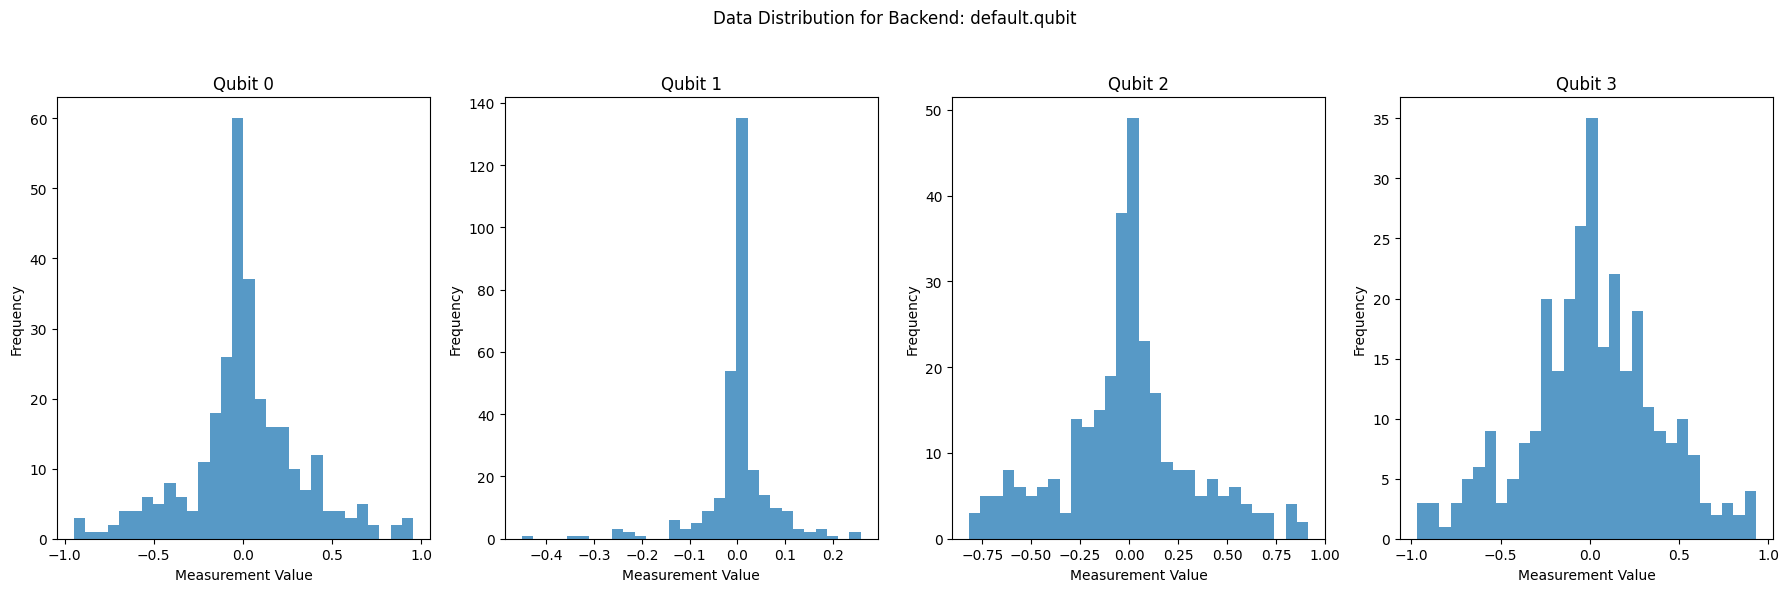

Epoch 1/5
Accuracy after training on 240 samples: 1.0
Epoch 2/5
Accuracy after training on 240 samples: 1.0
Epoch 3/5
Accuracy after training on 240 samples: 1.0
Epoch 4/5
Accuracy after training on 240 samples: 1.0
Epoch 5/5
Accuracy after training on 240 samples: 1.0
Output strings for backend default.qubit:
000-1000000-10
000000000000
00000000000-1
000000000000
-100100000-110
000000000-101
0000000-10-110
000100000000
0000-10100101
000-1000000-10
0000000-10000
0000000100-1-1
000000000000
001000000-100
000000000000
0000000-100-1-1
000000000-110
000-100000000
000000000000
001000100-100
000-100000010
1000000-10100
00-1000000-100
000000000000
000000100-1-10
001000000100
100100-100-100
000000010000
00000000001-1
000000101-101
00000000101-1
001000000100
000000-100100
-101000000100
000100000000
000000010100
00000000000-1
00-1000000100
000000000010
000000000001
000100000010
0000000-10-1-1-1
000000000-10-1
000000000000
0000000001-10
0000000000-10
000000001001
00000000-100-1
000000000000
00000

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Visualize the data using histograms
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a random forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
    else:
        print("No data available for training.")

# Print output strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


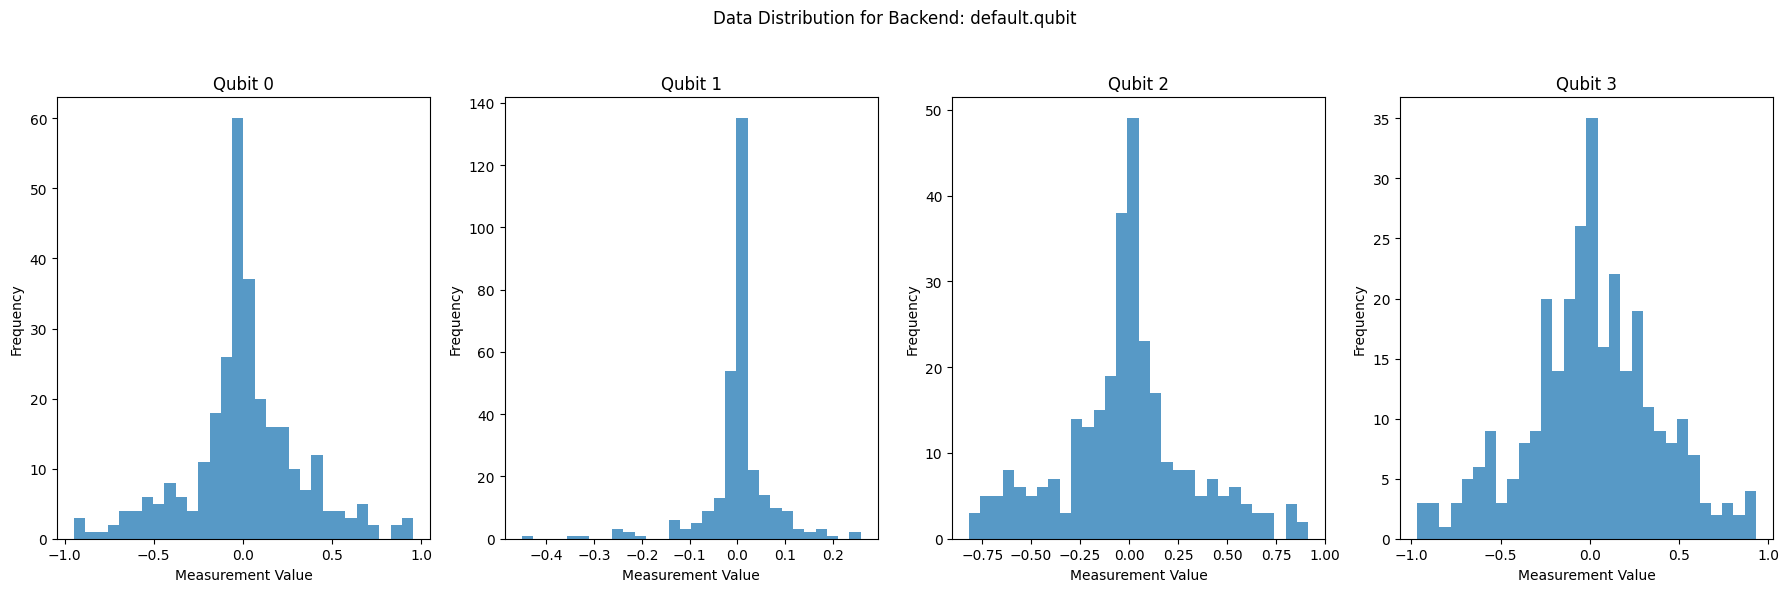

Epoch 1/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60



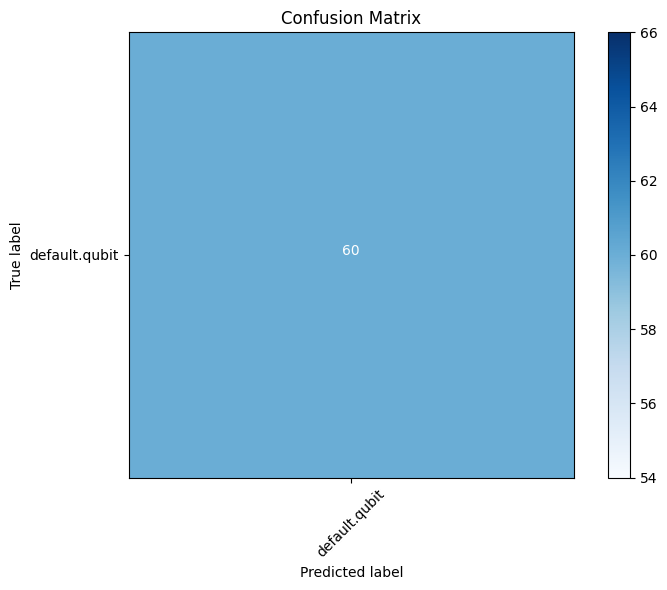

Epoch 2/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60



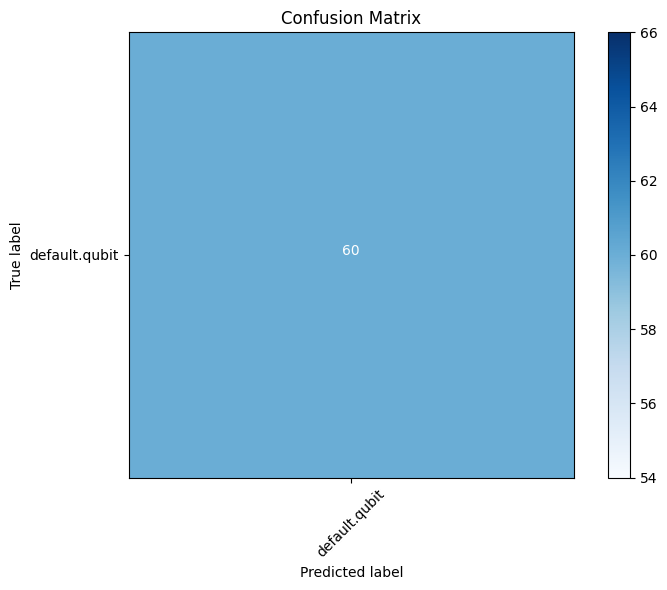

Epoch 3/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60



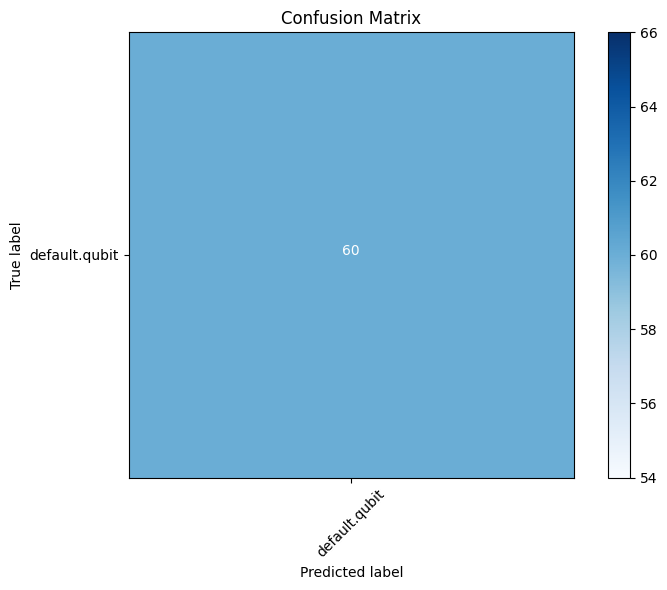

Epoch 4/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60



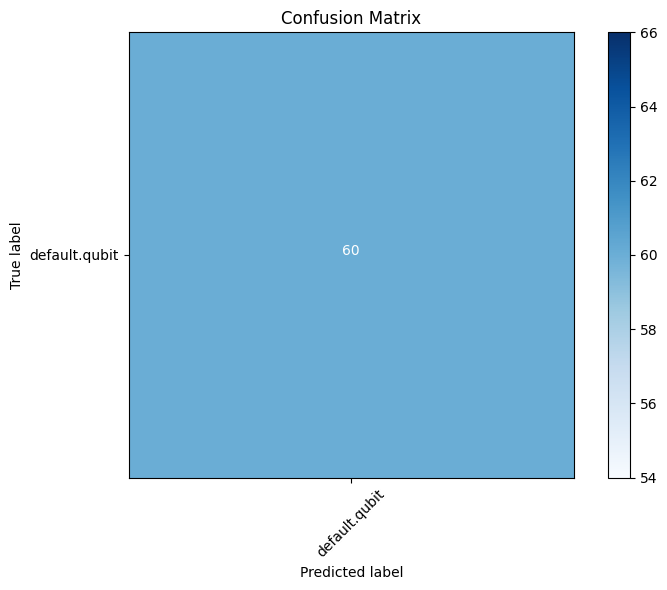

Epoch 5/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60



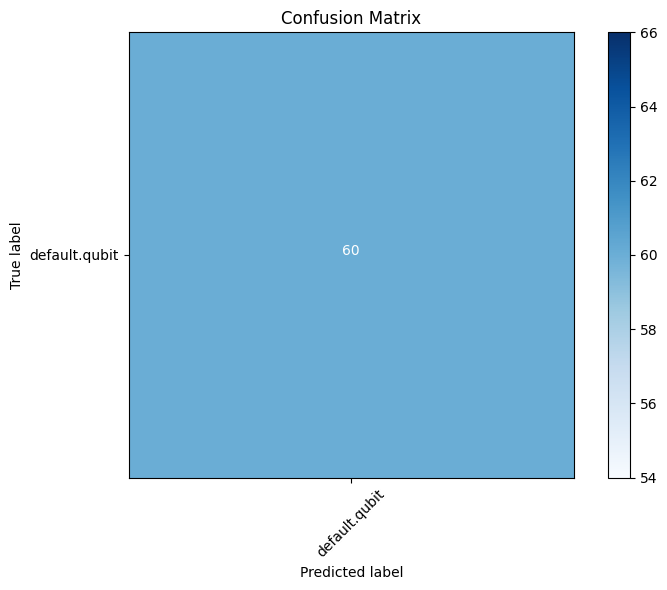

Output strings for backend default.qubit:
000-1000000-10
000000000000
00000000000-1
000000000000
-100100000-110
000000000-101
0000000-10-110
000100000000
0000-10100101
000-1000000-10
0000000-10000
0000000100-1-1
000000000000
001000000-100
000000000000
0000000-100-1-1
000000000-110
000-100000000
000000000000
001000100-100
000-100000010
1000000-10100
00-1000000-100
000000000000
000000100-1-10
001000000100
100100-100-100
000000010000
00000000001-1
000000101-101
00000000101-1
001000000100
000000-100100
-101000000100
000100000000
000000010100
00000000000-1
00-1000000100
000000000010
000000000001
000100000010
0000000-10-1-1-1
000000000-10-1
000000000000
0000000001-10
0000000000-10
000000001001
00000000-100-1
000000000000
0000000-100-10
0-100000010-1-1
000000000000
000000000001
10-1000000-111
-10-1-100000-11-1
000000-1-10100
100-100000-100
-100000010-11-1
000100000010
000000000000
0000000000-11
000-100000000
0000000011-11
0000000000-10
-100000-100-1-11
-101000-100101
000100010010
000000000-11

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import itertools

def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Visualize the data using histograms
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a random forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        unique_labels = np.unique(y_test)
        class_report = classification_report(y_test, y_pred, target_names=[backend_names[label] for label in unique_labels])

        print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Classification Report:")
        print(class_report)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.colorbar()
        tick_marks = np.arange(len(unique_labels))
        plt.xticks(tick_marks, [backend_names[label] for label in unique_labels], rotation=45)
        plt.yticks(tick_marks, [backend_names[label] for label in unique_labels])

        fmt = 'd'
        thresh = conf_matrix.max() / 2.
        for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
            plt.text(j, i, format(conf_matrix[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

    else:
        print("No data available for training.")

# Print output strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


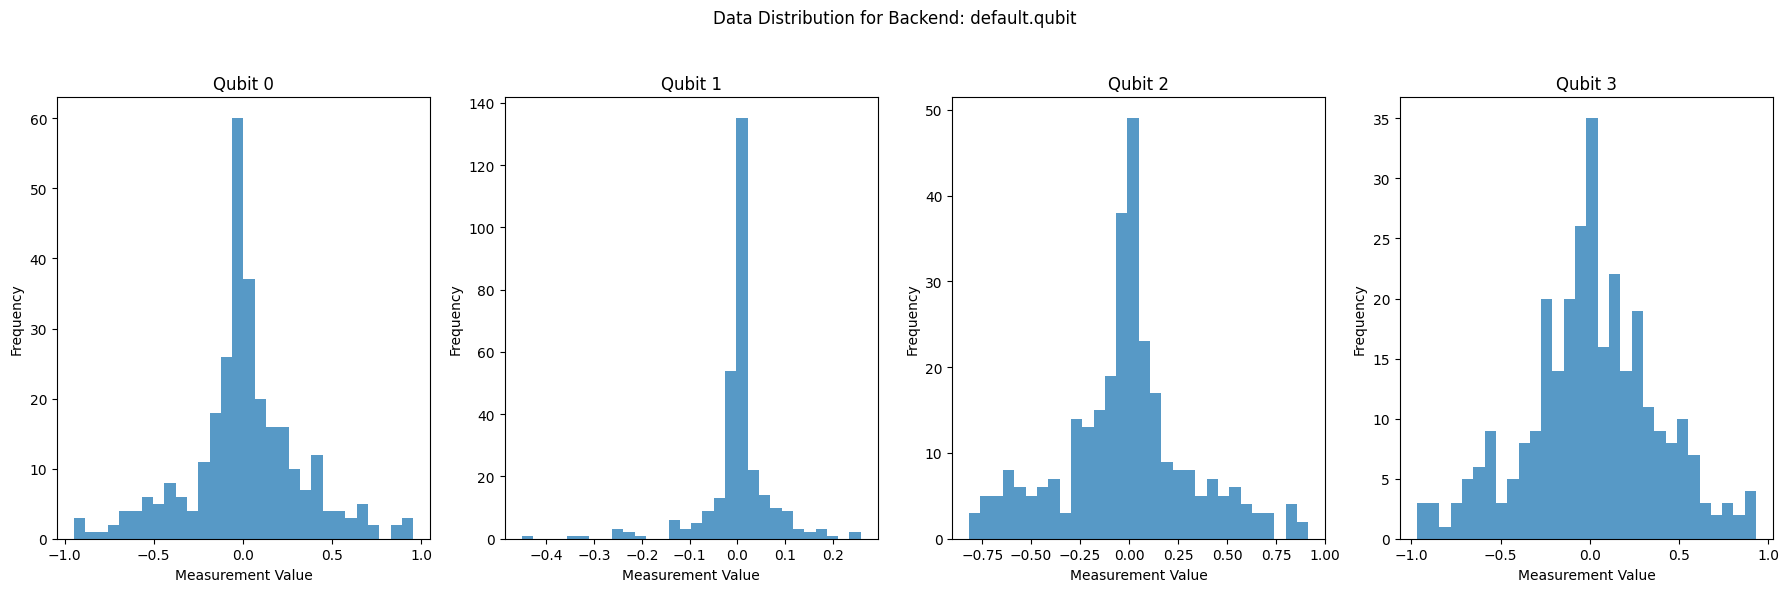

Epoch 1/5
Accuracy after training on 240 samples: 1.0
Epoch 2/5
Accuracy after training on 240 samples: 1.0
Epoch 3/5
Accuracy after training on 240 samples: 1.0
Epoch 4/5
Accuracy after training on 240 samples: 1.0
Epoch 5/5
Accuracy after training on 240 samples: 1.0
Output strings for backend default.qubit:
000-1000000-10
000000000000
00000000000-1
000000000000
-100100000-110
000000000-101
0000000-10-110
000100000000
0000-10100101
000-1000000-10
0000000-10000
0000000100-1-1
000000000000
001000000-100
000000000000
0000000-100-1-1
000000000-110
000-100000000
000000000000
001000100-100
000-100000010
1000000-10100
00-1000000-100
000000000000
000000100-1-10
001000000100
100100-100-100
000000010000
00000000001-1
000000101-101
00000000101-1
001000000100
000000-100100
-101000000100
000100000000
000000010100
00000000000-1
00-1000000100
000000000010
000000000001
000100000010
0000000-10-1-1-1
000000000-10-1
000000000000
0000000001-10
0000000000-10
000000001001
00000000-100-1
000000000000
00000

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Visualize the data using histograms
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a random forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
    else:
        print("No data available for training.")

# Print output strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100
print(f"Accuracy after training on {X_train.shape[0]} samples: {accuracy_percent:.2f}%")
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test set:", accuracy)

In [ ]:
!pip install pennylane-lightning[kokkos]
!pip install pennylane-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
!pip install amazon-braket-pennylane-plugin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.6/312.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.7/191.7 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 12.6 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=a

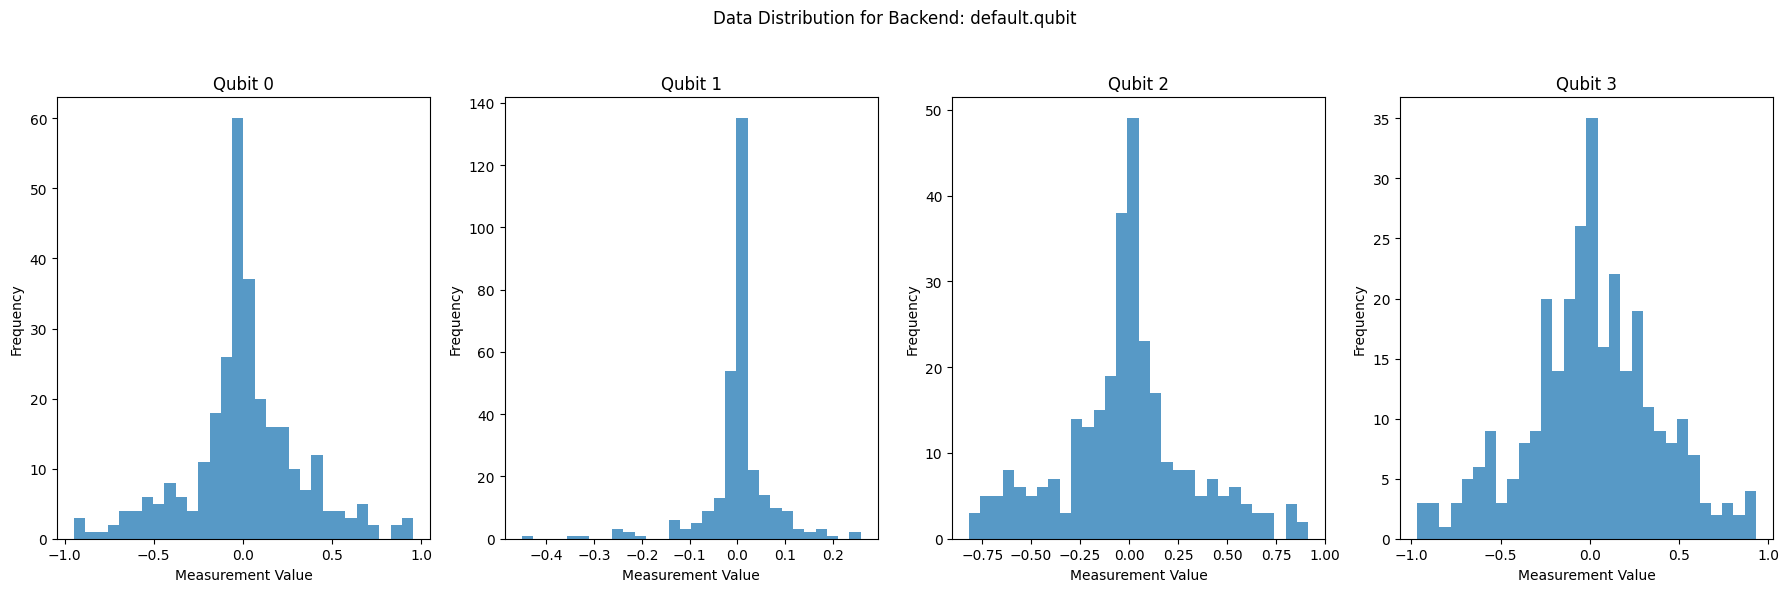

Epoch 1/5
Accuracy after training on 240 samples: 1.0
Epoch 2/5
Accuracy after training on 240 samples: 1.0
Epoch 3/5
Accuracy after training on 240 samples: 1.0
Epoch 4/5
Accuracy after training on 240 samples: 1.0
Epoch 5/5
Accuracy after training on 240 samples: 1.0
Output strings for backend default.qubit:
000-1000000-10
000000000000
00000000000-1
000000000000
-100100000-110
000000000-101
0000000-10-110
000100000000
0000-10100101
000-1000000-10
0000000-10000
0000000100-1-1
000000000000
001000000-100
000000000000
0000000-100-1-1
000000000-110
000-100000000
000000000000
001000100-100
000-100000010
1000000-10100
00-1000000-100
000000000000
000000100-1-10
001000000100
100100-100-100
000000010000
00000000001-1
000000101-101
00000000101-1
001000000100
000000-100100
-101000000100
000100000000
000000010100
00000000000-1
00-1000000100
000000000010
000000000001
000100000010
0000000-10-1-1-1
000000000-10-1
000000000000
0000000001-10
0000000000-10
000000001001
00000000-100-1
000000000000
00000

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pennylane as qml
dev = qml.device("lightning.kokkos", wires=2)

def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Visualize the data using histograms
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a random forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
    else:
        print("No data available for training.")

# Print output strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100
print(f"Accuracy after training on {X_train.shape[0]} samples: {accuracy_percent:.2f}%")
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test set:", accuracy)

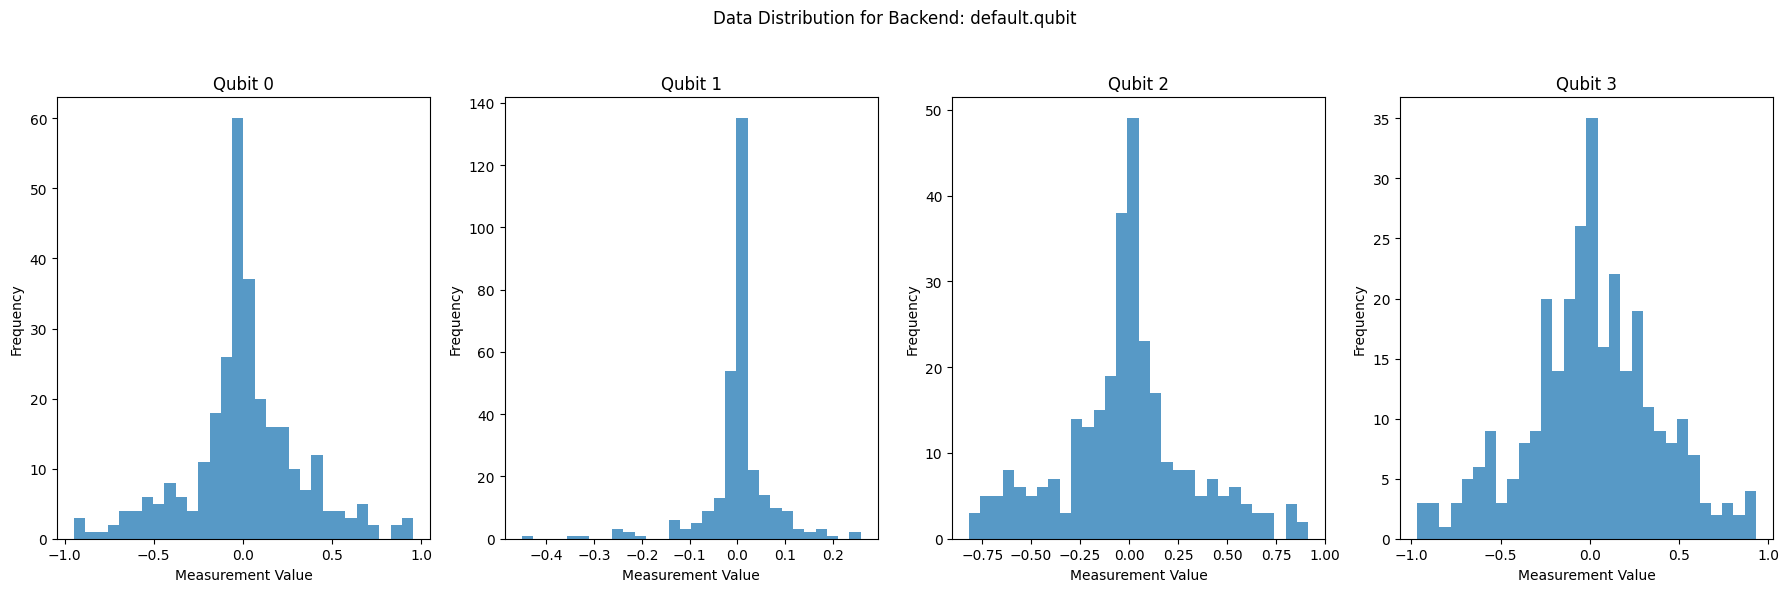

Epoch 1/5
Accuracy after training on 240 samples: 1.0
Epoch 2/5
Accuracy after training on 240 samples: 1.0
Epoch 3/5
Accuracy after training on 240 samples: 1.0
Epoch 4/5
Accuracy after training on 240 samples: 1.0
Epoch 5/5
Accuracy after training on 240 samples: 1.0
Output strings for backend default.qubit:
000-1000000-10
000000000000
00000000000-1
000000000000
-100100000-110
000000000-101
0000000-10-110
000100000000
0000-10100101
000-1000000-10
0000000-10000
0000000100-1-1
000000000000
001000000-100
000000000000
0000000-100-1-1
000000000-110
000-100000000
000000000000
001000100-100
000-100000010
1000000-10100
00-1000000-100
000000000000
000000100-1-10
001000000100
100100-100-100
000000010000
00000000001-1
000000101-101
00000000101-1
001000000100
000000-100100
-101000000100
000100000000
000000010100
00000000000-1
00-1000000100
000000000010
000000000001
000100000010
0000000-10-1-1-1
000000000-10-1
000000000000
0000000001-10
0000000000-10
000000001001
00000000-100-1
000000000000
00000

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pennylane as qml
dev = qml.device("lightning.qubit", wires=2)

def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Visualize the data using histograms
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a random forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
    else:
        print("No data available for training.")

# Print output strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100
print(f"Accuracy after training on {X_train.shape[0]} samples: {accuracy_percent:.2f}%")
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test set:", accuracy)

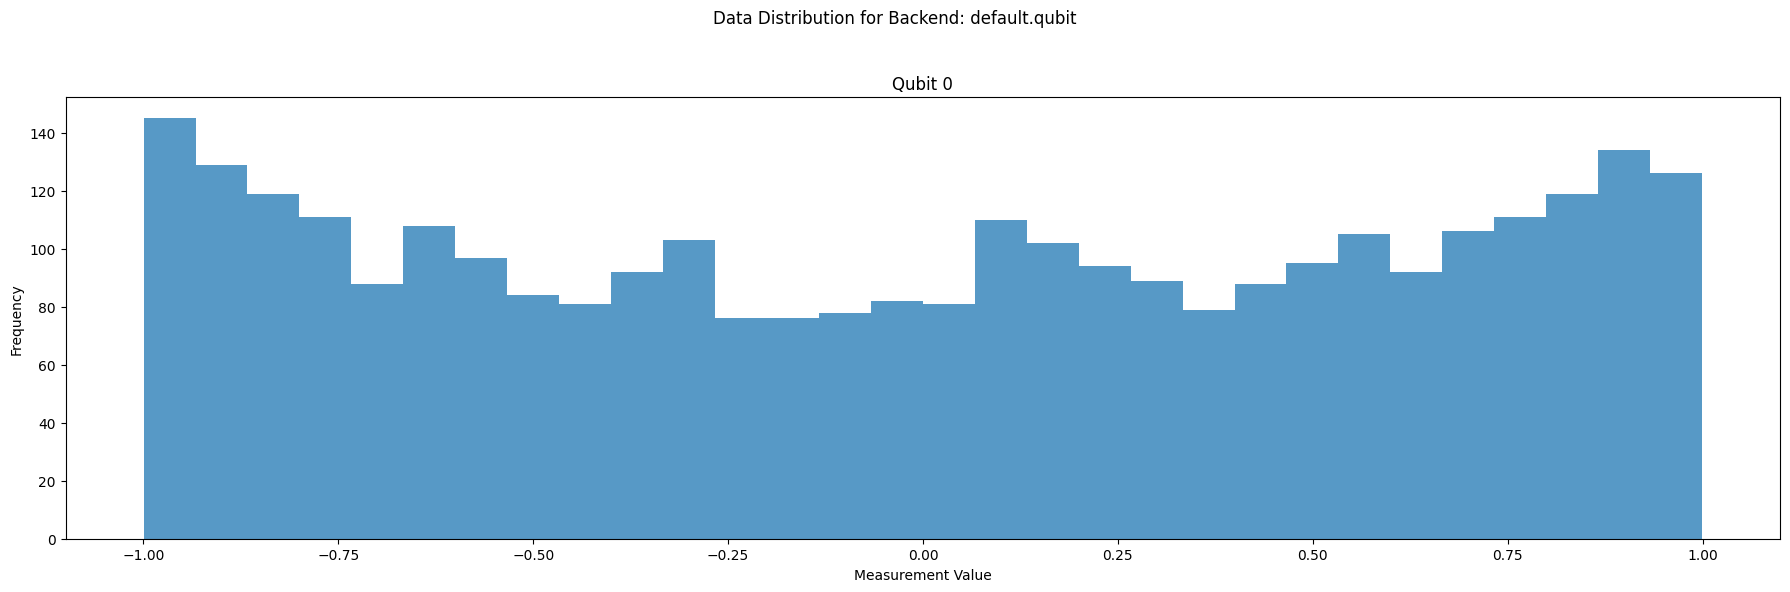

Epoch 1/5
Accuracy on test set: 1.0
Accuracy after training on 2400 samples: 1.0
Epoch 2/5
Accuracy on test set: 1.0
Accuracy after training on 2400 samples: 1.0
Epoch 3/5
Accuracy on test set: 1.0
Accuracy after training on 2400 samples: 1.0
Epoch 4/5
Accuracy on test set: 1.0
Accuracy after training on 2400 samples: 1.0
Epoch 5/5
Accuracy on test set: 1.0
Accuracy after training on 2400 samples: 1.0
Output strings for backend default.qubit:
001
0-10
100
-1-10
010
100
101
00-1
110
100
-100
0-10
0-10
0-11
-100
-100
0-11
0-10
0-10
001
00-1
0-10
011
100
010
110
0-1-1
010
00-1
01-1
101
-110
-100
1-10
0-10
001
101
011
1-11
01-1
100
010
010
0-10
-101
00-1
101
001
10-1
0-10
-100
01-1
-10-1
-100
-100
001
-1-10
00-1
01-1
100
001
001
-110
100
00-1
011
00-1
010
-101
-100
-100
01-1
0-10
01-1
-110
00-1
0-1-1
010
1-10
-10-1
1-10
0-1-1
110
-100
01-1
100
010
110
-101
-100
00-1
-10-1
010
-100
010
001
011
011
-10-1
-100
-1-10
-100
101
1-10
110
-101
-1-10
-100
100
010
-100
100
010
1-10
-100
010
-100
1-1

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Setup Quantum Backends
qubits = 1
depth = 2
num_samples = 1000
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Visualize the data using histograms
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a Multi-Layer Perceptron classifier
        model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        print("Accuracy on test set:", accuracy)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
    else:
        print("No data available for training.")

# Print output strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print


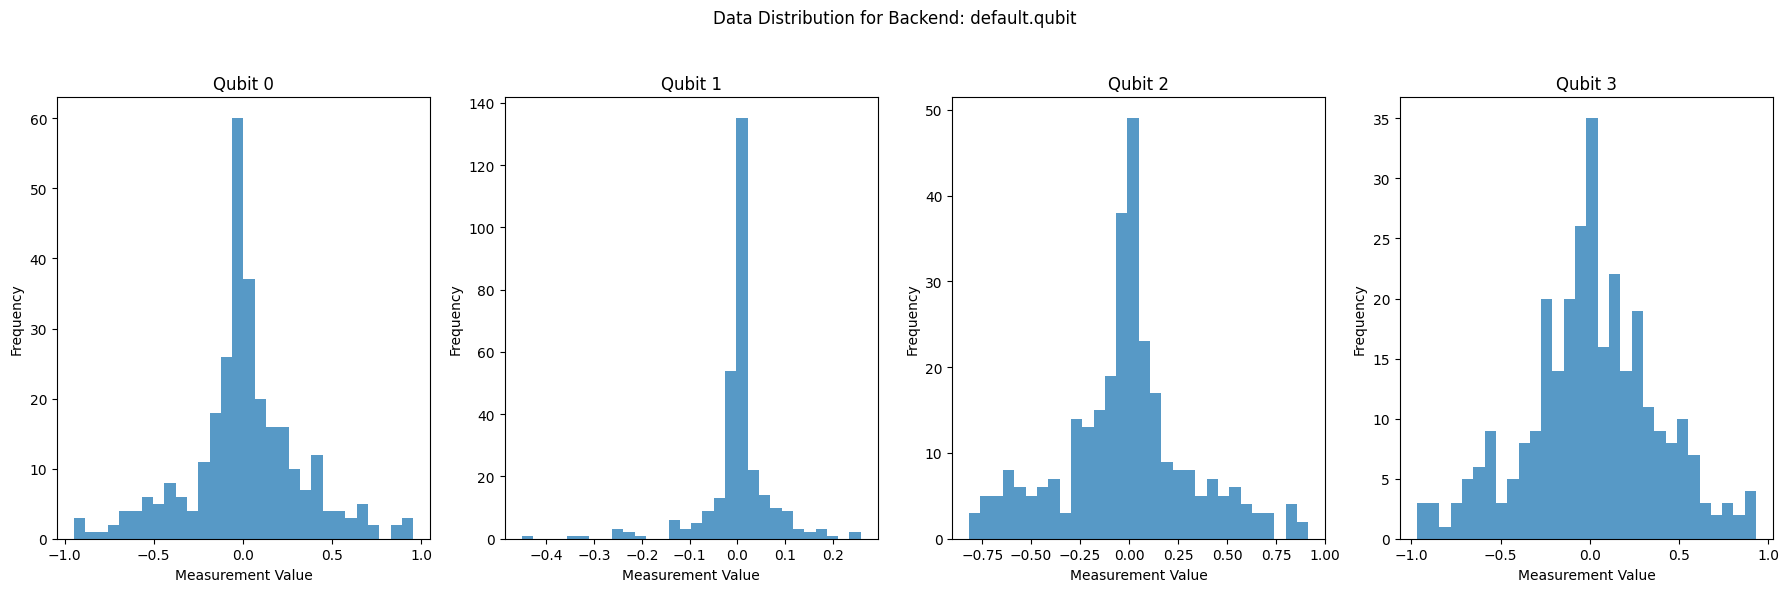

Epoch 1/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60

Epoch 2/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60

Epoch 3/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy             

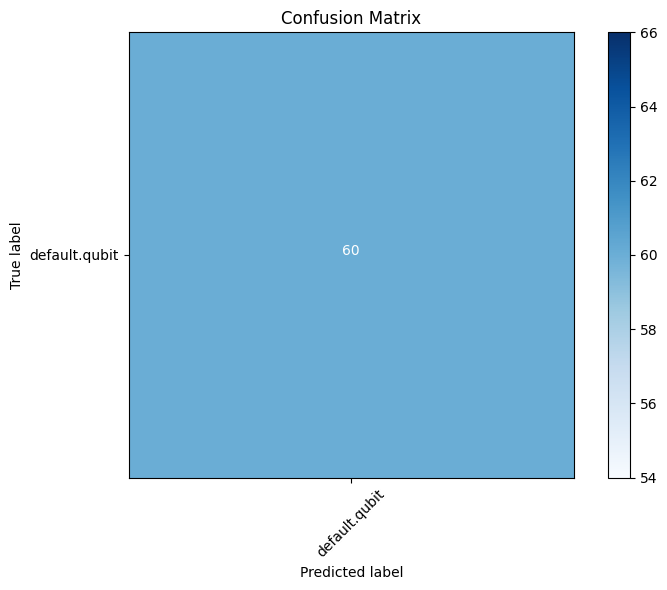

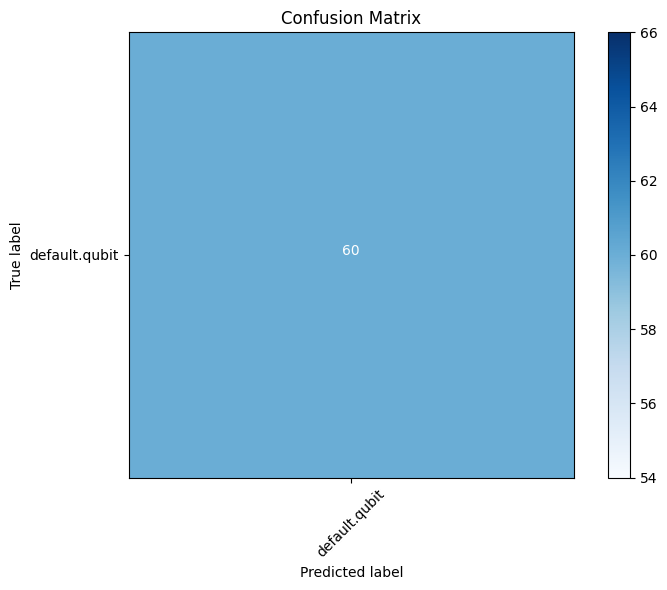

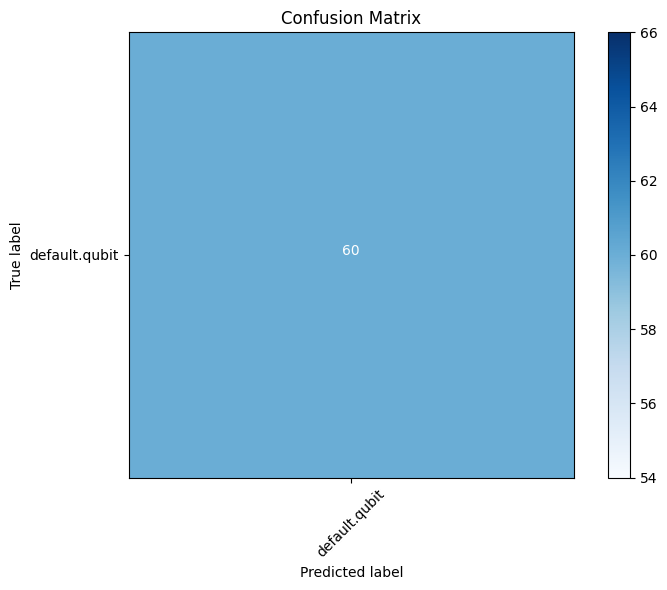

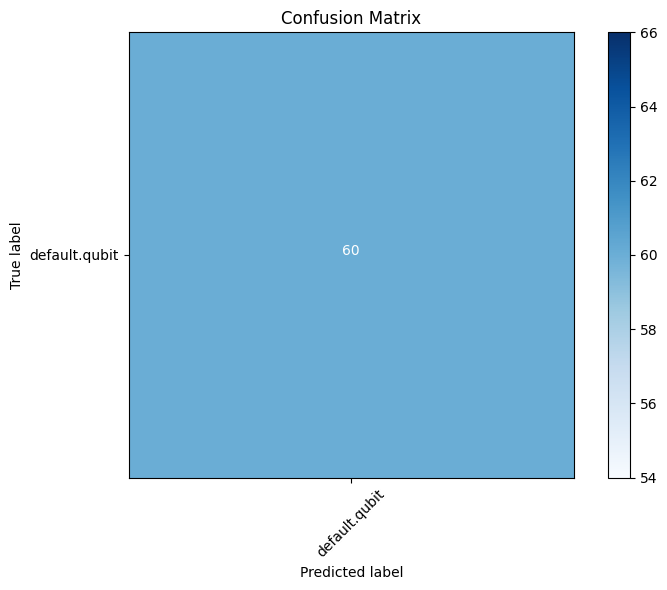

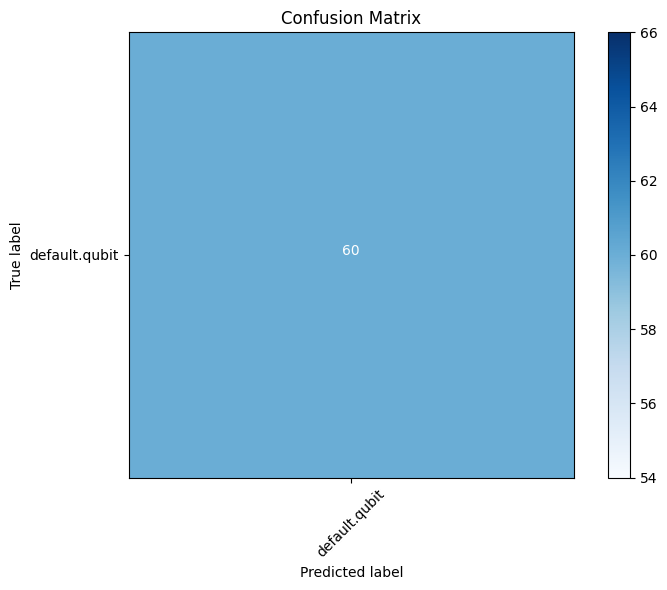

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import itertools

def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Visualize the data using histograms
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a random forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        unique_labels = np.unique(y_test)
        class_report = classification_report(y_test, y_pred, target_names=[backend_names[label] for label in unique_labels])

        print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Classification Report:")
        print(class_report)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.colorbar()
        tick_marks = np.arange(len(unique_labels))
        plt.xticks(tick_marks, [backend_names[label] for label in unique_labels], rotation=45)
        plt.yticks(tick_marks, [backend_names[label] for label in unique_labels])

        fmt = 'd'
        thresh = conf_matrix.max() / 2.
        for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
            plt.text(j, i, format(conf_matrix[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()


In [ ]:
!pip install git+https://www.github.com/johannesjmeyer/pennylane-pyquest

  Cloning https://www.github.com/johannesjmeyer/pennylane-pyquest to /tmp/pip-req-build-34em9n94
  Running command git clone --filter=blob:none --quiet https://www.github.com/johannesjmeyer/pennylane-pyquest /tmp/pip-req-build-34em9n94
  Resolved https://www.github.com/johannesjmeyer/pennylane-pyquest to commit b0d9704996bd33ef0437fc84b11471f70c8a7fb0
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for Pennylane-Pyquest: filename=Pennylane_Pyquest-0.1.0-py3-none-any.whl size=16516 sha256=d55a4b73bf1f3c7c80952e4de858af2a00419f3d79578fc300636127f7063081
  Stored in directory: /tmp/pip-ephem-wheel-cache-abmkqgxw/wheels/08/27/76/8f1610c983bd6b515126eec09f5748cb16020393614e6d3b85
  Created wheel for pyquest-cffi: filename=pyquest_cffi-3.2.5-cp310-cp310-linux_x86_64.whl size=349281 sha256=ef5df4c4f8e3f02d83bd63e2072817938d1e276cda09fa56b50669e04f811674
  Stored in directory: /root/.cache/pip/wheels/a4/e6/93/33ffd2b4bfa3bb3293acd84fdd160d638a4

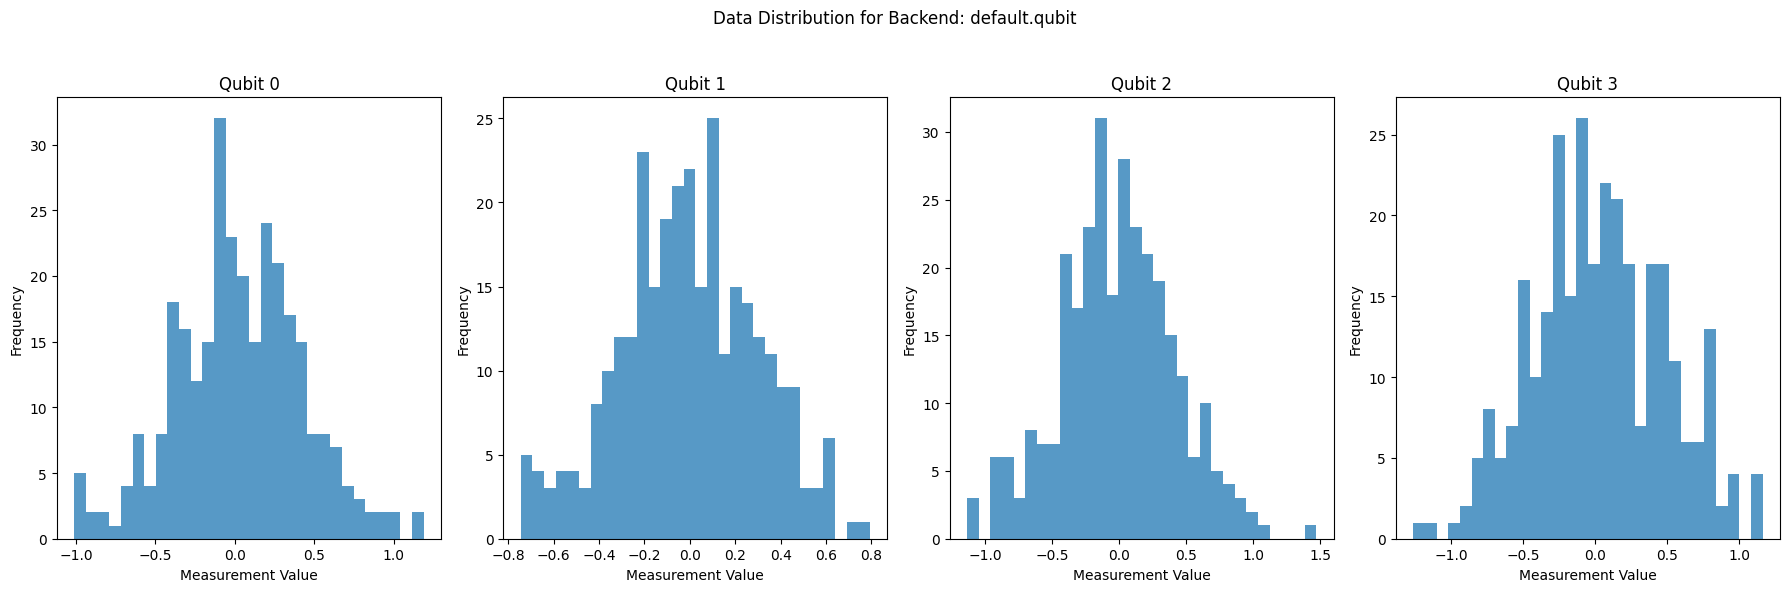

Epoch 1/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60



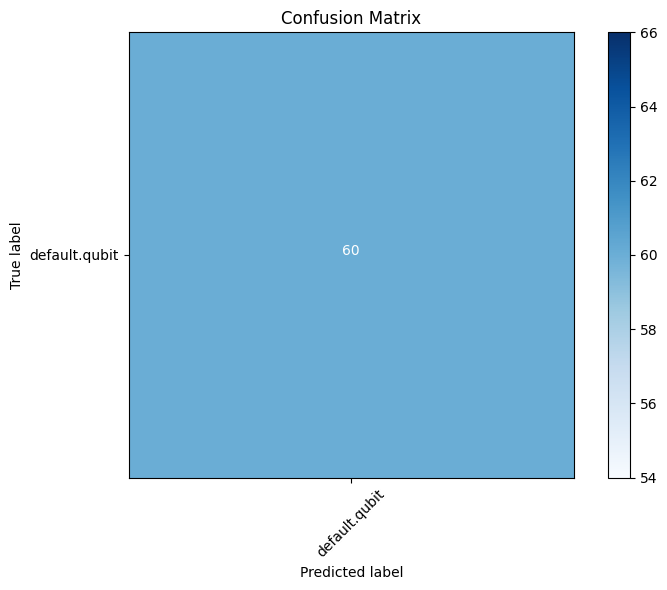

Epoch 2/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60



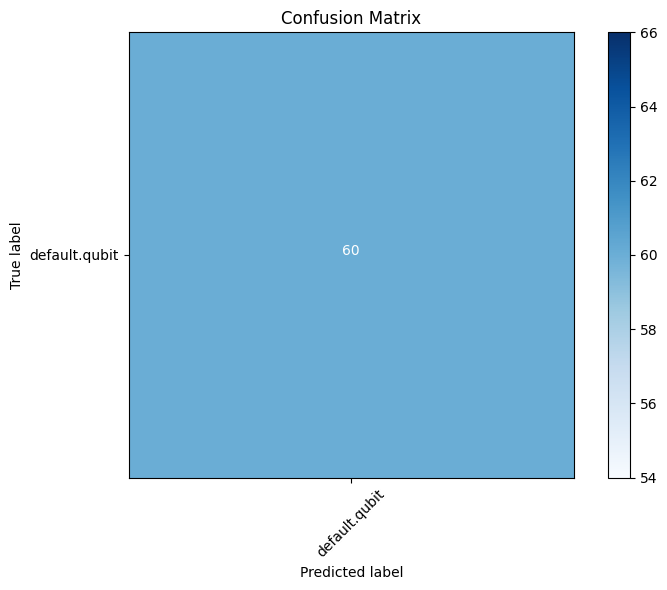

Epoch 3/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60



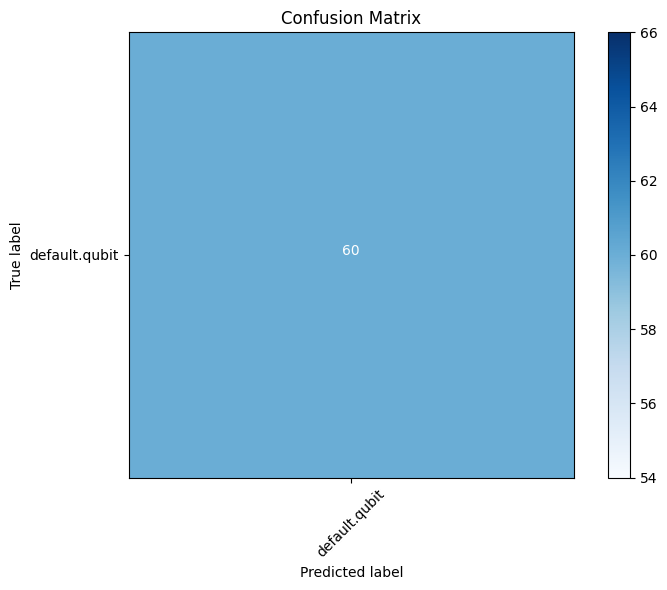

Epoch 4/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60



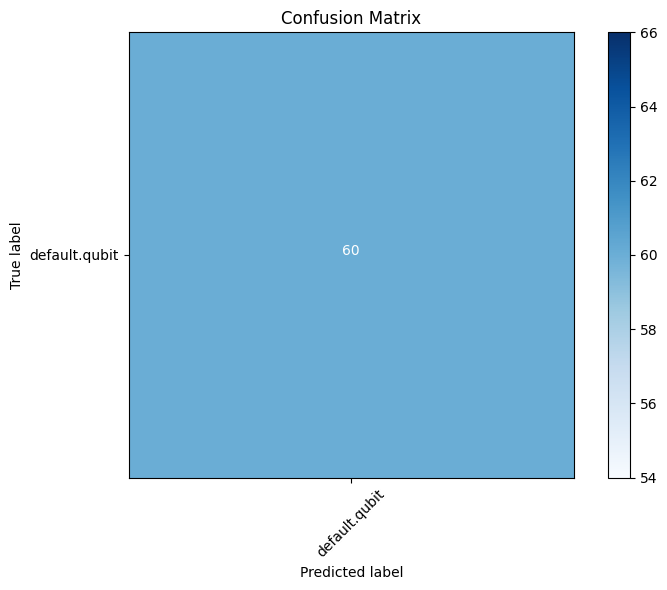

Epoch 5/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60



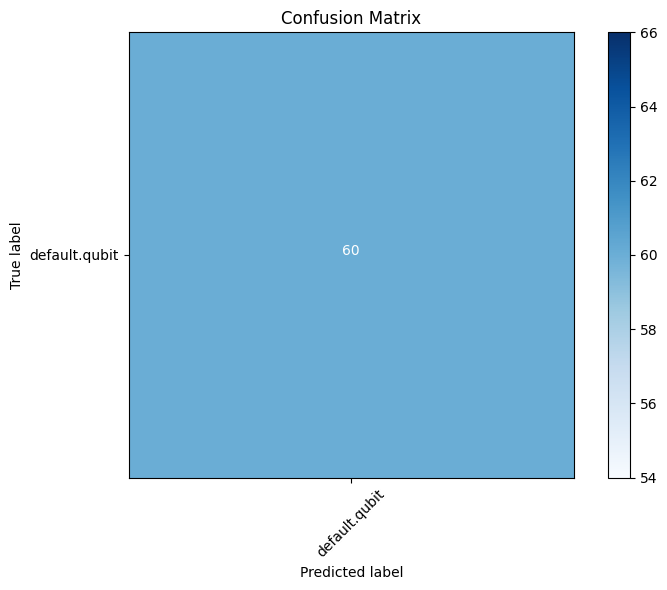

Output strings for backend default.qubit:
0000000-10010
001000000-1-11
0000000000-10
000-100000010
0000000-10000
000000010000
000000000-110
000-100000001
00-100000010-1
0000000000-11
00000000000-1
000000010000
100100100-101
000000000000
000010100-101
000000000010
0000000000-10
00-1000000100
0010-10-10110-1
00-100000110-1
000000000001
000000000000
00000000-1001
000000010010
00000000-101-1
0000000000-10
000100000000
000000000000
000100010000
00-1000-10-110-1
0000000000-1-1
000000000110
00000000-1001
00000000001-1
000-1000-10000
00-1000000110
0000000000-10
0000000001-10
000000000000
0000000000-11
-101-100100100
00000000-101-1
-101000010100
0000000-10010
000000000001
0000000-10-1-10
000-100010000
1000000001-11
00000000001-1
000000000000
000000000100
000000000010
0000000000-10
000000000000
000000-100101
100-100110-110
0000000001-10
-100-1001-10100
000100000010
000000000000
000000000010
101100000100
000000100100
000000000001
00000000000-1
000000000000
0000000000-11
00000000001-1
000000000000

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import itertools

def quantum_volume_circuit_with_noise(qubits, depth, noise_strength=0.3, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
noise_strength = 0.3
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit_with_noise(qubits, depth, noise_strength)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        # Add noise to the measurement results
        noisy_result = result + np.random.normal(scale=noise_strength, size=result.shape)
        data[backend.name].append(noisy_result)

# Visualize the data using histograms
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a random forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        unique_labels = np.unique(y_test)
        class_report = classification_report(y_test, y_pred, target_names=[backend_names[label] for label in unique_labels])

        print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Classification Report:")
        print(class_report)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.colorbar()
        tick_marks = np.arange(len(unique_labels))
        plt.xticks(tick_marks, [backend_names[label] for label in unique_labels], rotation=45)
        plt.yticks(tick_marks, [backend_names[label] for label in unique_labels])

        fmt = 'd'
        thresh = conf_matrix.max() / 2.
        for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
            plt.text(j, i, format(conf_matrix[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

    else:
        print("No data available for training.")

# Print output strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


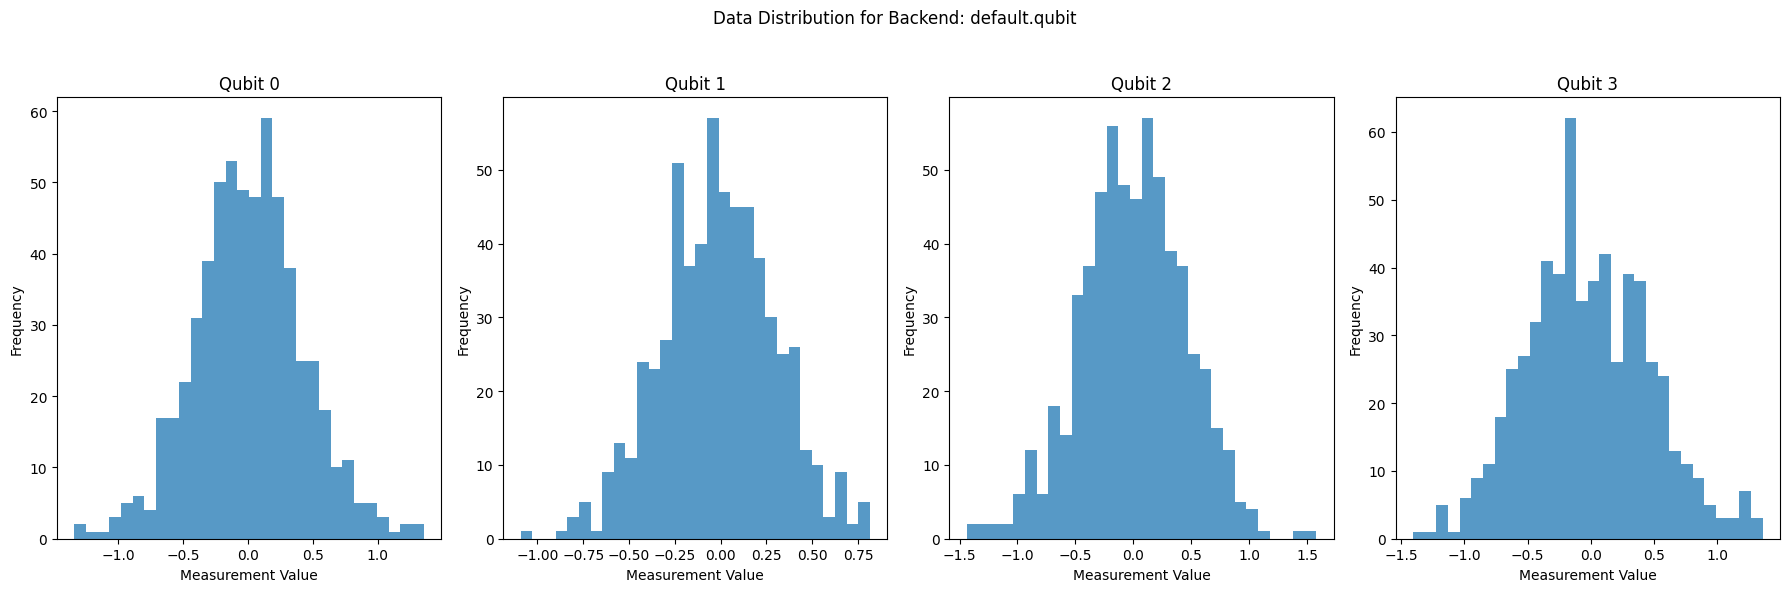

Epoch 1/5
Insufficient class diversity after split. Adjusting the dataset.
Epoch 2/5
Insufficient class diversity after split. Adjusting the dataset.
Epoch 3/5
Insufficient class diversity after split. Adjusting the dataset.
Epoch 4/5
Insufficient class diversity after split. Adjusting the dataset.
Epoch 5/5
Insufficient class diversity after split. Adjusting the dataset.
Output strings for backend default.qubit:
000000100-1-10
000000000-100
000-1000-100-10
0000000000-1-1
000-100000000
00000000-100-1
000-10000000-1
100100100100
001000-10-1-10-1
00000000001-1
000000000-110
0000000000-10
000000000000
00000000000-1
0000000-10000
000000000000
00000000-1001
-10-1000010-101
000000100-1-10
0000001-10-100
000000000-10-1
000000010000
000000001001
0000000000-10
0000000000-1-1
101000-10010-1
001010000101
0000000-1000-1
000000000001
0000000000-10
000000000000
000000000010
00000000001-1
001000000100
000000000000
000000000001
00000000011-1
000000000000
0000000-10000
000000000001
000000000-10-1
00000

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import itertools

def quantum_volume_circuit_with_noise(qubits, depth, noise_strength=0.3, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        np.random.seed(seed)
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 200  # Increase sample size
noise_strength = 0.3
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit_with_noise(qubits, depth, noise_strength)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        # Add noise to the measurement results
        noisy_result = result + np.random.normal(scale=noise_strength, size=result.shape)
        data[backend.name].append(noisy_result)

# Visualize the data using histograms
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        # Apply PCA for feature extraction
        pca = PCA(n_components=10)
        X = pca.fit_transform(X)

        # Use stratified split to ensure balanced class distribution
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        # Check if y_train and y_test have more than one class
        if len(np.unique(y_train)) < 2 or len(np.unique(y_test)) < 2:
            print("Insufficient class diversity after split. Adjusting the dataset.")
            continue

        # Train an SVM classifier
        model = SVC(kernel='rbf', random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        unique_labels = np.unique(y_test)
        class_report = classification_report(y_test, y_pred, target_names=[backend_names[label] for label in unique_labels])

        print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Classification Report:")
        print(class_report)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.colorbar()
        tick_marks = np.arange(len(unique_labels))
        plt.xticks(tick_marks, [backend_names[label] for label in unique_labels], rotation=45)
        plt.yticks(tick_marks, [backend_names[label] for label in unique_labels])

        fmt = 'd'
        thresh = conf_matrix.max() / 2.
        for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
            plt.text(j, i, format(conf_matrix[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

    else:
        print("No data available for training.")

# Print output strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


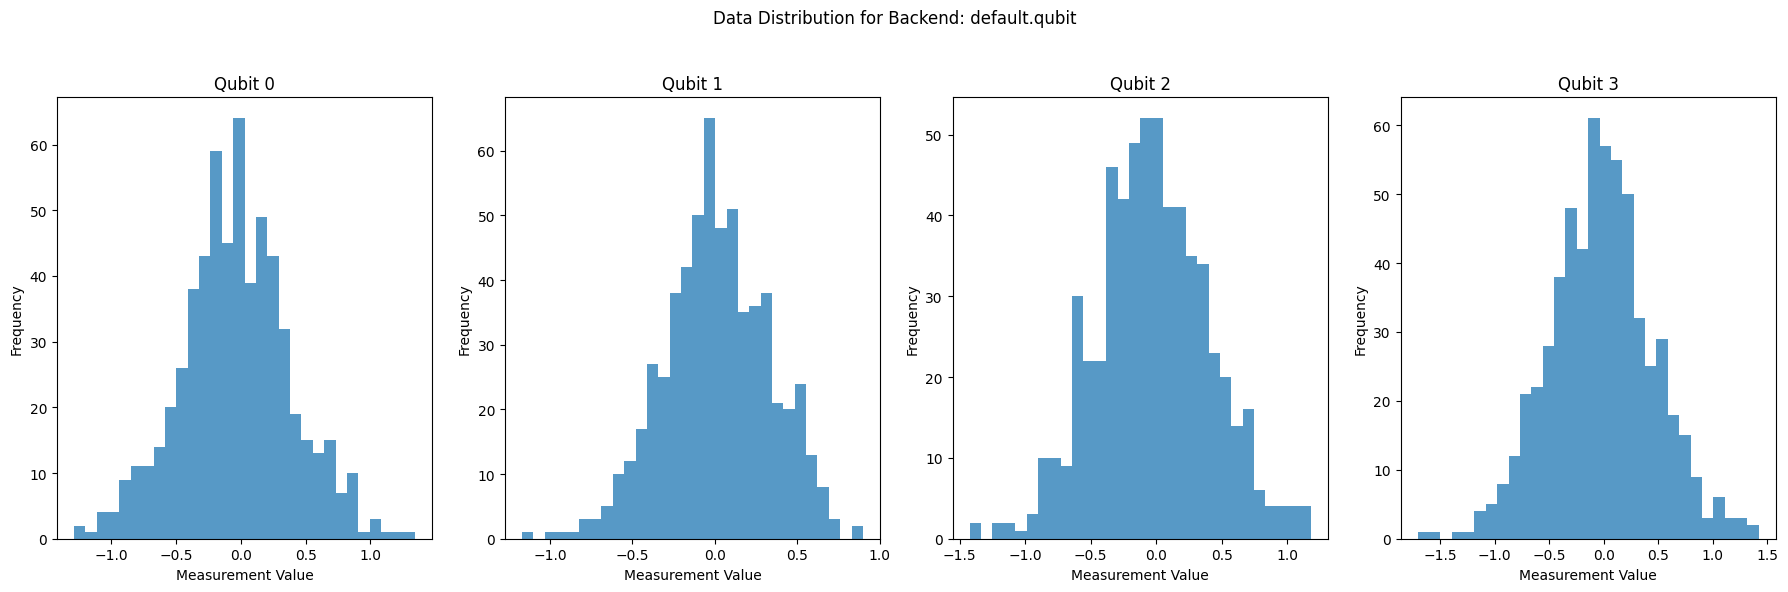

Epoch 1/5
Insufficient class diversity after split. Adjusting the dataset.
Epoch 2/5
Insufficient class diversity after split. Adjusting the dataset.
Epoch 3/5
Insufficient class diversity after split. Adjusting the dataset.
Epoch 4/5
Insufficient class diversity after split. Adjusting the dataset.
Epoch 5/5
Insufficient class diversity after split. Adjusting the dataset.
Output strings for backend default.qubit:
000000000100
10-1000000-101
00000000001-1
000000000001
00-1010000-10-1
00000000101-1
001000000110
00000001000-1
000000000000
-100100000-1-10
0000000-10000
000000000000
00-1000000100
0000000000-10
000000-100100
0000000000-1-1
0001000000-10
000000010001
000000000000
000000010000
00-1000001-10-1
00000000000-1
0000000-10-110
000000000-101
000000000000
000000000001
000-100010110
00000000000-1
000000000000
00000000-110-1
000000000000
00010000000-1
00-1100000100
0000-10-10011-1
00000000000-1
00000000-100-1
000-10000000-1
000000010000
000000000000
000100000000
000000000000
00010000000

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import itertools

def quantum_volume_circuit_with_noise(qubits, depth, noise_strength=0.3, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        np.random.seed(seed)
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 200  # Increase sample size
noise_strength = 0.3
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit_with_noise(qubits, depth, noise_strength)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        # Add noise to the measurement results
        noisy_result = result + np.random.normal(scale=noise_strength, size=result.shape)
        data[backend.name].append(noisy_result)

# Visualize the data using histograms
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        # Apply PCA for feature extraction
        pca = PCA(n_components=10)
        X = pca.fit_transform(X)

        # Use stratified split to ensure balanced class distribution
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        # Check if y_train and y_test have more than one class
        if len(np.unique(y_train)) < 2 or len(np.unique(y_test)) < 2:
            print("Insufficient class diversity after split. Adjusting the dataset.")
            continue

        # Train an SVM classifier
        model = SVC(kernel='rbf', random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        unique_labels = np.unique(y_test)
        class_report = classification_report(y_test, y_pred, target_names=[backend_names[label] for label in unique_labels])

        print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Classification Report:")
        print(class_report)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.colorbar()
        tick_marks = np.arange(len(unique_labels))
        plt.xticks(tick_marks, [backend_names[label] for label in unique_labels], rotation=45)
        plt.yticks(tick_marks, [backend_names[label] for label in unique_labels])

        fmt = 'd'
        thresh = conf_matrix.max() / 2.
        for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
            plt.text(j, i, format(conf_matrix[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

    else:
        print("No data available for training.")

# Print output strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


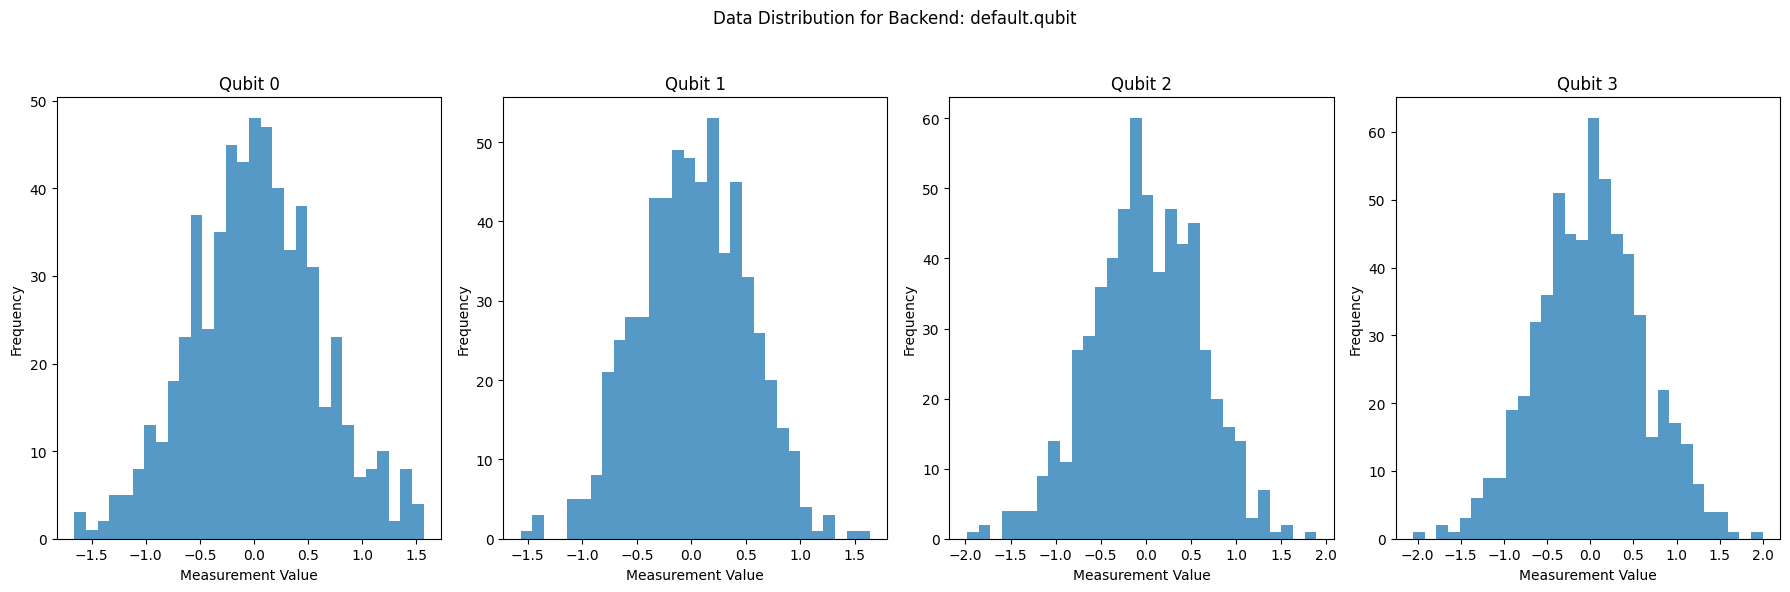

Epoch 1/5
Insufficient class diversity after split. Adjusting the dataset.
Epoch 2/5
Insufficient class diversity after split. Adjusting the dataset.
Epoch 3/5
Insufficient class diversity after split. Adjusting the dataset.
Epoch 4/5
Insufficient class diversity after split. Adjusting the dataset.
Epoch 5/5
Insufficient class diversity after split. Adjusting the dataset.
Output strings for backend default.qubit:
-100-100100-100
100000010-1-10
0000000000-1-1
00000000001-1
000000000000
00000000101-1
000000000011
000000000000
000000000000
0000000-10000
000000000001
000000000010
-1010000001-1-1
0000000000-10
000100000001
000100010-100
-100000-110100
0001000001-10
000000000000
000-100000000
-100100000-1-10
000-100010010
001000000100
000000000000
0000000100-10
001000000100
000000000001
100-100000-110
0000-10000-101
000000000000
000000000010
000000000001
000000010000
0000000-100-11
001000000100
000000000000
-100-100000-1-10
0000000-100-1-1
000000000110
000000001001
00000000000-1
0000000-1000

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import itertools

def quantum_volume_circuit_with_noise(qubits, depth, noise_strength=0.5, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        np.random.seed(seed)
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 200  # Increase sample size
noise_strength = 0.5
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit_with_noise(qubits, depth, noise_strength)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        # Add noise to the measurement results
        noisy_result = result + np.random.normal(scale=noise_strength, size=result.shape)
        data[backend.name].append(noisy_result)

# Visualize the data using histograms
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        # Apply PCA for feature extraction
        pca = PCA(n_components=10)
        X = pca.fit_transform(X)

        # Ensure class diversity before splitting the dataset
        unique_classes, class_counts = np.unique(y, return_counts=True)
        if len(unique_classes) > 1:
            # Use stratified split to ensure balanced class distribution
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

            # Train a Gradient Boosting classifier
            model = GradientBoostingClassifier(random_state=42)
            model.fit(X_train, y_train)

            # Evaluate the model
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            conf_matrix = confusion_matrix(y_test, y_pred)

            unique_labels = np.unique(y_test)
            class_report = classification_report(y_test, y_pred, target_names=[backend_names[label] for label in unique_labels])

            print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
            print("Confusion Matrix:")
            print(conf_matrix)
            print("Classification Report:")
            print(class_report)

            # Plot confusion matrix
            plt.figure(figsize=(8, 6))
            plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
            plt.title("Confusion Matrix")
            plt.colorbar()
            tick_marks = np.arange(len(unique_labels))
            plt.xticks(tick_marks, [backend_names[label] for label in unique_labels], rotation=45)
            plt.yticks(tick_marks, [backend_names[label] for label in unique_labels])

            fmt = 'd'
            thresh = conf_matrix.max() / 2.
            for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
                plt.text(j, i, format(conf_matrix[i, j], fmt),
                         horizontalalignment="center",
                         color="white" if conf_matrix[i, j] > thresh else "black")

            plt.ylabel('True label')
            plt.xlabel('Predicted label')
            plt.tight_layout()
            plt.show()
        else:
            print("Insufficient class diversity after split. Adjusting the dataset.")

    else:
        print("No data available for training.")

# Print output strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


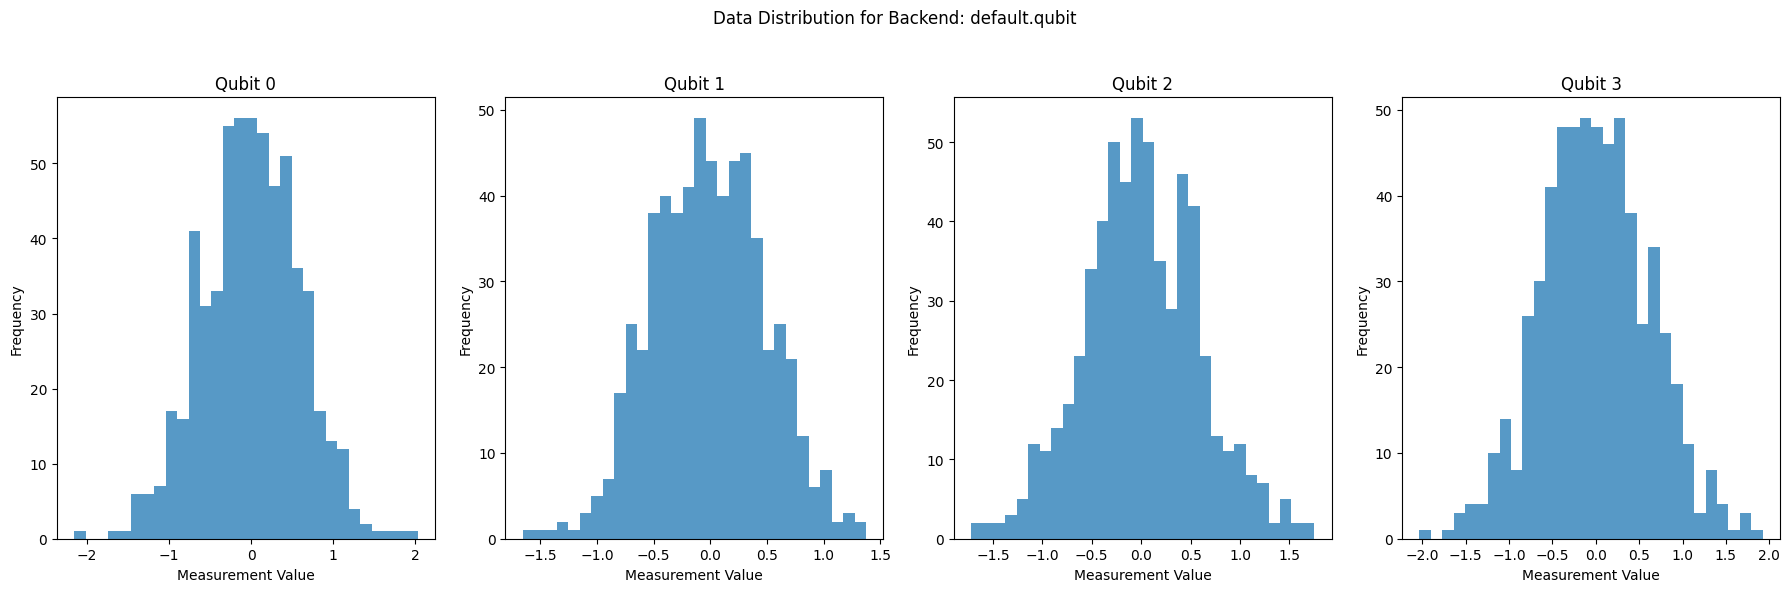

Epoch 1/5
Insufficient class diversity after split. Adjusting the dataset.
Epoch 2/5
Insufficient class diversity after split. Adjusting the dataset.
Epoch 3/5
Insufficient class diversity after split. Adjusting the dataset.
Epoch 4/5
Insufficient class diversity after split. Adjusting the dataset.
Epoch 5/5
Insufficient class diversity after split. Adjusting the dataset.
Output strings for backend default.qubit:
000-100010000
00000000000-1
000000000010
-10-11000-10-1-10
000000000001
000000-100100
001000000100
00000000-1011
000000000-1-10
-10-1-100000-100
00000000000-1
001000001-10-1
000-1000000-10
000000000001
000000000001
000000-10-1-10-1
0001000000-10
000000000000
0000001001-10
0000000000-10
000000000000
0000000000-1-1
0000000100-10
-100100-100100
0000000000-10
000-100000000
100000110100
001000100100
0000000-10001
000000000010
00000000000-1
000100000000
000-100000000
000100100-100
0000000-10000
0000000000-10
000000000001
-100-100100-101
000100000000
000000-100-100
000-10000000-1
000

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import pennylane as qml
import matplotlib.pyplot as plt
import itertools

# Generate synthetic data from generalized quantum circuits
def generate_quantum_data(num_samples, num_features):
    # Generate synthetic quantum data here
    # Replace this with actual quantum circuit simulations or device data
    return np.random.rand(num_samples, num_features), np.random.randint(2, size=num_samples)

# Define the classifier model
def build_classifier():
    return RandomForestClassifier(n_estimators=100, random_state=42)

# Generate quantum volume circuit with noise
def quantum_volume_circuit_with_noise(qubits, depth, noise_strength=0.5, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        np.random.seed(seed)
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 200
noise_strength = 0.5
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit_with_noise(qubits, depth, noise_strength)
    circuits.append((dev, circuit))

# Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        # Add noise to the measurement results
        noisy_result = result + np.random.normal(scale=noise_strength, size=result.shape)
        data[backend.name].append(noisy_result)

# Visualize the data using histograms
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        # Apply PCA for feature extraction
        pca = PCA(n_components=10)
        X = pca.fit_transform(X)

        # Ensure class diversity before splitting the dataset
        unique_classes, class_counts = np.unique(y, return_counts=True)
        if len(unique_classes) > 1:
            # Use stratified split to ensure balanced class distribution
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

            # Train a RandomForestClassifier
            model = build_classifier()
            model.fit(X_train, y_train)

            # Evaluate the model
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            conf_matrix = confusion_matrix(y_test, y_pred)

            unique_labels = np.unique(y_test)
            class_report = classification_report(y_test, y_pred, target_names=[backend_names[label] for label in unique_labels])

            print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
            print("Confusion Matrix:")
            print(conf_matrix)
            print("Classification Report:")
            print(class_report)

            # Plot confusion matrix
            plt.figure(figsize=(8, 6))
            plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
            plt.title("Confusion Matrix")
            plt.colorbar()
            tick_marks = np.arange(len(unique_labels))
            plt.xticks(tick_marks, [backend_names[label] for label in unique_labels], rotation=45)
            plt.yticks(tick_marks, [backend_names[label] for label in unique_labels])

            fmt = 'd'
            thresh = conf_matrix.max() / 2.
            for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
                plt.text(j, i, format(conf_matrix[i, j], fmt),
                         horizontalalignment="center",
                         color="white" if conf_matrix[i, j] > thresh else "black")

            plt.ylabel('True label')
            plt.xlabel('Predicted label')
            plt.tight_layout()
            plt.show()
        else:
            print("Insufficient class diversity after split. Adjusting the dataset.")

    else:
        print("No data available for training.")

# Print output strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


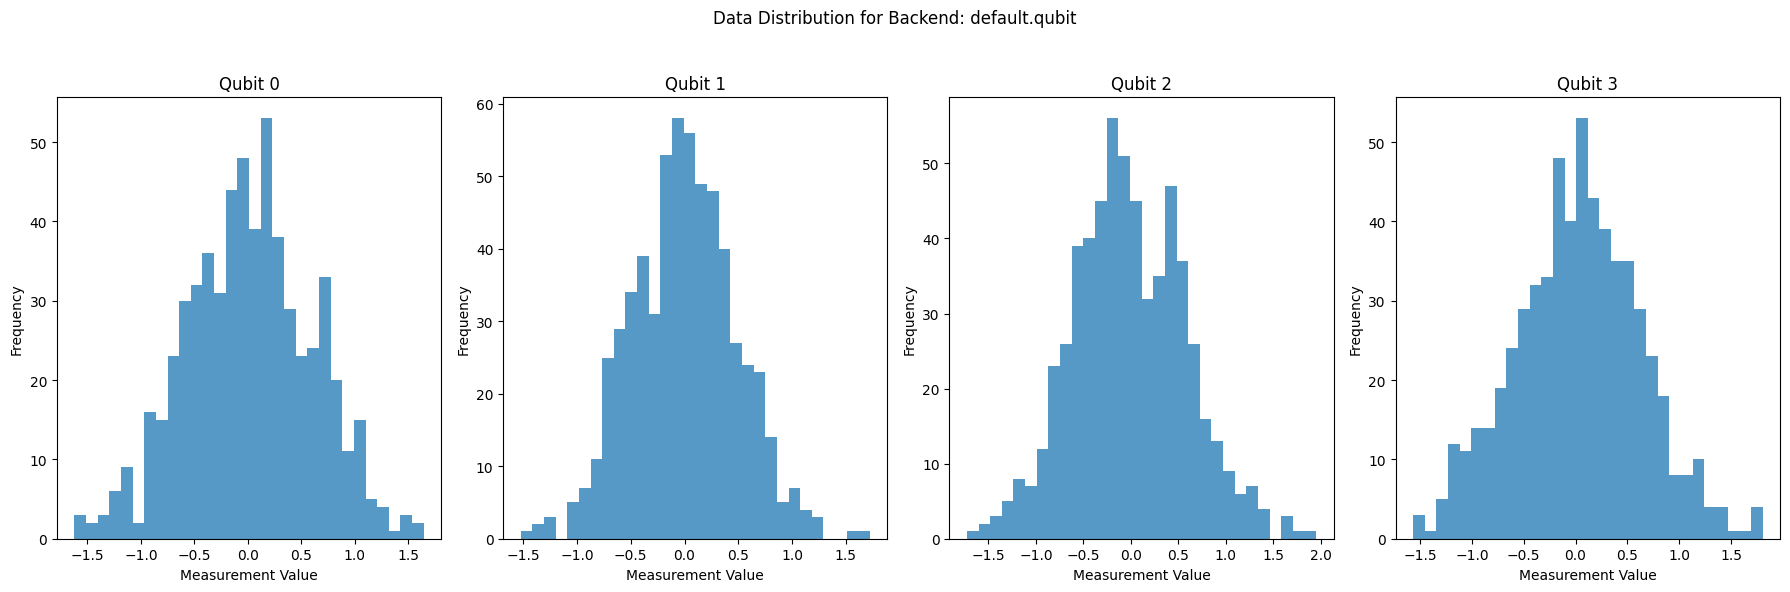

Discriminator Step 0: cost = -0.09970904115862822


Discriminator Step 5: cost = -0.30906770314836507


Discriminator Step 10: cost = -0.45622520338790984


Discriminator Step 15: cost = -0.4851485964221509


Discriminator Step 20: cost = -0.49262499045495783


Discriminator Step 25: cost = -0.49647168195932484


Discriminator Step 30: cost = -0.49892977022806084


Discriminator Step 35: cost = -0.500510642046136


Discriminator Step 40: cost = -0.5015054758242152


Discriminator Step 45: cost = -0.5021205809480955


Generator Step 0: cost = -0.5785418848765307


Generator Step 5: cost = -0.8881131980281911


Generator Step 10: cost = -0.97677279230703


Generator Step 15: cost = -0.9938478159259776


Generator Step 20: cost = -0.9981388367772662


Generator Step 25: cost = -0.9994136119520148


Generator Step 30: cost = -0.9998128434031248


Generator Step 35: cost = -0.999939967191088


Generator Step 40: cost = -0.9999806999244751


Generator Step 45: cost = -0.9999937879589484


Prob(real classified as real): 0.999347436936117
Prob(fake classified as real): 0.999997490492547
Discriminator cost: 0.000650053556429997
Real Bloch vector: [tensor(-0.21694187, requires_grad=True), tensor(0.45048443, requires_grad=True), tensor(-0.8660254, requires_grad=True)]
Generator Bloch vector: [<tf.Tensor: shape=(), dtype=float64, numpy=-0.2565969766523795>, <tf.Tensor: shape=(), dtype=float64, numpy=0.42012335364183706>, <tf.Tensor: shape=(), dtype=float64, numpy=-0.8704294235934562>]
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


In [ ]:
import numpy as np
import pennylane as qml
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import itertools
import pennylane as qml
import tensorflow as tf


# Set the seed for reproducibility
np.random.seed(42)

# Setup Quantum Backends and Parameters
qubits = 4
depth = 2
num_samples = 200
noise_strength = 0.5
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

# Define Quantum Volume Circuit with Noise
def quantum_volume_circuit_with_noise(qubits, depth, noise_strength=0.5, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        np.random.seed(seed)
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Generate Synthetic Data
circuits = []
for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit_with_noise(qubits, depth, noise_strength)
    circuits.append((dev, circuit))

data = {backend_name: [] for backend_name in backend_names}
for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())
        noisy_result = result + np.random.normal(scale=noise_strength, size=result.shape)
        data[backend.name].append(noisy_result)

# Visualize Data Distributions
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


# Real Data Circuit
def real(angles, **kwargs):
    qml.Hadamard(wires=0)
    qml.Rot(*angles, wires=0)

# Generator Circuit
def generator(w, **kwargs):
    qml.Hadamard(wires=0)
    qml.RX(w[0], wires=0)
    qml.RX(w[1], wires=1)
    qml.RY(w[2], wires=0)
    qml.RY(w[3], wires=1)
    qml.RZ(w[4], wires=0)
    qml.RZ(w[5], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RX(w[6], wires=0)
    qml.RY(w[7], wires=0)
    qml.RZ(w[8], wires=0)

# Discriminator Circuit
def discriminator(w):
    qml.Hadamard(wires=0)
    qml.RX(w[0], wires=0)
    qml.RX(w[1], wires=2)
    qml.RY(w[2], wires=0)
    qml.RY(w[3], wires=2)
    qml.RZ(w[4], wires=0)
    qml.RZ(w[5], wires=2)
    qml.CNOT(wires=[0, 2])
    qml.RX(w[6], wires=2)
    qml.RY(w[7], wires=2)
    qml.RZ(w[8], wires=2)

# QNodes
@qml.qnode(dev)
def real_disc_circuit(phi, theta, omega, disc_weights):
    real([phi, theta, omega])
    discriminator(disc_weights)
    return qml.expval(qml.PauliZ(2))

@qml.qnode(dev)
def gen_disc_circuit(gen_weights, disc_weights):
    generator(gen_weights)
    discriminator(disc_weights)
    return qml.expval(qml.PauliZ(2))

# QGAN Cost Functions
def prob_real_true(disc_weights):
    true_disc_output = real_disc_circuit(phi, theta, omega, disc_weights)
    return (true_disc_output + 1) / 2

def prob_fake_true(gen_weights, disc_weights):
    fake_disc_output = gen_disc_circuit(gen_weights, disc_weights)
    return (fake_disc_output + 1) / 2

def disc_cost(disc_weights):
    return prob_fake_true(gen_weights, disc_weights) - prob_real_true(disc_weights)

def gen_cost(gen_weights):
    return -prob_fake_true(gen_weights, disc_weights)

# Training QGAN
phi = np.pi / 6
theta = np.pi / 2
omega = np.pi / 7
eps = 1e-2
init_gen_weights = np.array([np.pi] + [0] * 8) + np.random.normal(scale=eps, size=(9,))
init_disc_weights = np.random.normal(size=(9,))

gen_weights = tf.Variable(init_gen_weights)
disc_weights = tf.Variable(init_disc_weights)

opt = tf.keras.optimizers.SGD(0.4)
opt.build([disc_weights, gen_weights])

# Train Discriminator
cost = lambda: disc_cost(disc_weights)
for step in range(50):
    opt.minimize(cost, [disc_weights])
    if step % 5 == 0:
        print(f"Discriminator Step {step}: cost = {cost().numpy()}")

# Train Generator
cost = lambda: gen_cost(gen_weights)
for step in range(50):
    opt.minimize(cost, [gen_weights])
    if step % 5 == 0:
        print(f"Generator Step {step}: cost = {cost().numpy()}")

print(f"Prob(real classified as real): {prob_real_true(disc_weights).numpy()}")
print(f"Prob(fake classified as real): {prob_fake_true(gen_weights, disc_weights).numpy()}")
print(f"Discriminator cost: {disc_cost(disc_weights).numpy()}")

# Compare Real and Generator States
obs = [qml.PauliX(0), qml.PauliY(0), qml.PauliZ(0)]

@qml.qnode(dev)
def bloch_vector_real(angles):
    real(angles)
    return [qml.expval(o) for o in obs]

@qml.qnode(dev)
def bloch_vector_generator(angles):
    generator(angles)
    return [qml.expval(o) for o in obs]

print(f"Real Bloch vector: {bloch_vector_real([phi, theta, omega])}")
print(f"Generator Bloch vector: {bloch_vector_generator(gen_weights)}")

# Specify Number of Epochs for Classifier Training
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        # Apply PCA for Feature Extraction
        pca = PCA(n_components=10)
        X = pca.fit_transform(X)

        # Ensure Class Diversity Before Splitting the Dataset
        unique_classes, class_counts = np.unique(y, return_counts=True)
        if len(unique_classes) > 1:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

            model = RandomForestClassifier(n_estimators=100, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            conf_matrix = confusion_matrix(y_test, y_pred)
            class_report = classification_report(y_test, y_pred, target_names=backend_names)

            print(f"Test Accuracy: {accuracy:.2f}")
            print("Confusion Matrix:")
            print(conf_matrix)
            print("Classification Report:")
            print(class_report)

            # Plot Confusion Matrix
            plt.figure(figsize=(8, 6))
            plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
            plt.title(f"Confusion Matrix (Epoch {epoch + 1})")
            plt.colorbar()
            tick_marks = np.arange(len(backend_names))
            plt.xticks(tick_marks, backend_names, rotation=45)
            plt.yticks(tick_marks, backend_names)

            fmt = 'd'
            thresh = conf_matrix.max() / 2.
            for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
                plt.text(j, i, format(conf_matrix[i, j], fmt),
                         horizontalalignment="center",
                         color="white" if conf_matrix[i, j] > thresh else "black")

            plt.ylabel('True label')
            plt.xlabel('Predicted label')
            plt.tight_layout()
            plt.show()


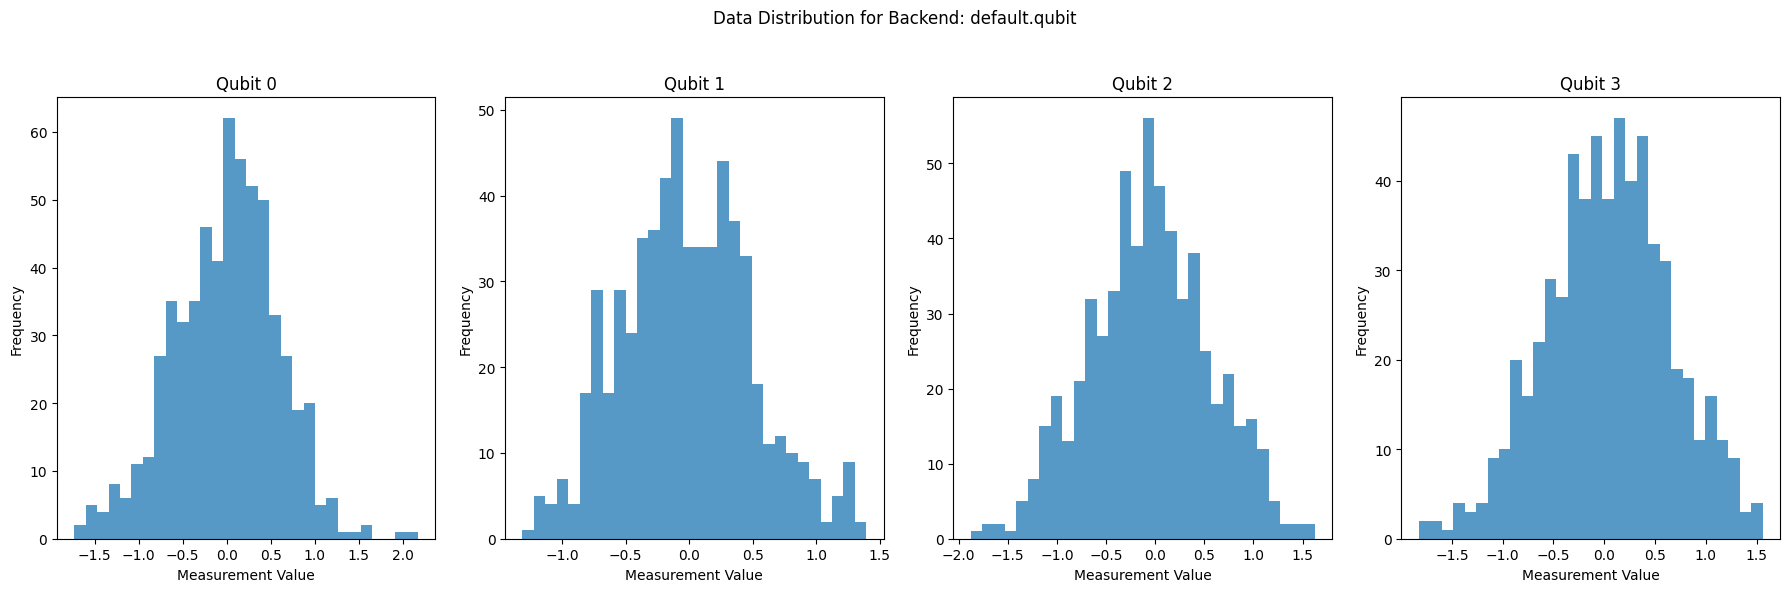

Discriminator Step 0: cost = -0.18894145953984803


Discriminator Step 5: cost = -0.4090370703233438


Discriminator Step 10: cost = -0.45158404996348045


Discriminator Step 15: cost = -0.4613229600299742


Discriminator Step 20: cost = -0.4691896226143391


Discriminator Step 25: cost = -0.47701826685899057


Discriminator Step 30: cost = -0.4841993602174425


Discriminator Step 35: cost = -0.4901426963046478


Discriminator Step 40: cost = -0.4946290633805668


Discriminator Step 45: cost = -0.49777522264017826


Generator Step 0: cost = -0.583859721729143


Generator Step 5: cost = -0.8960971280434599


Generator Step 10: cost = -0.9759840122287728


Generator Step 15: cost = -0.9925095090944702


Generator Step 20: cost = -0.9973403793030688


Generator Step 25: cost = -0.9990151558391273


Generator Step 30: cost = -0.9996296361909509


Generator Step 35: cost = -0.999859804228537


Generator Step 40: cost = -0.9999467674946004


Generator Step 45: cost = -0.999979756081072


Prob(real classified as real): 0.996099981979268
Prob(fake classified as real): 0.9999906532984468
Discriminator cost: 0.0038906713191788622
Real Bloch vector: [tensor(-0.21694187, requires_grad=True), tensor(0.45048443, requires_grad=True), tensor(-0.8660254, requires_grad=True)]
Generator Bloch vector: [<tf.Tensor: shape=(), dtype=float64, numpy=-0.3037802159803423>, <tf.Tensor: shape=(), dtype=float64, numpy=0.3637829636644431>, <tf.Tensor: shape=(), dtype=float64, numpy=-0.8805405871203237>]
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:545: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


ValueError: X has 1 features, but GradientBoostingClassifier is expecting 10 features as input.

In [ ]:
import numpy as np
import pennylane as qml
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import itertools
import pennylane as qml
import tensorflow as tf


# Set the seed for reproducibility
np.random.seed(42)

# Setup Quantum Backends and Parameters
qubits = 4
depth = 2
num_samples = 200
noise_strength = 0.5
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

# Define Quantum Volume Circuit with Noise
def quantum_volume_circuit_with_noise(qubits, depth, noise_strength=0.5, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        np.random.seed(seed)
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Generate Synthetic Data
circuits = []
for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit_with_noise(qubits, depth, noise_strength)
    circuits.append((dev, circuit))

data = {backend_name: [] for backend_name in backend_names}
for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())
        noisy_result = result + np.random.normal(scale=noise_strength, size=result.shape)
        data[backend.name].append(noisy_result)

# Visualize Data Distributions
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


# Real Data Circuit
def real(angles, **kwargs):
    qml.Hadamard(wires=0)
    qml.Rot(*angles, wires=0)

# Generator Circuit
def generator(w, **kwargs):
    qml.Hadamard(wires=0)
    qml.RX(w[0], wires=0)
    qml.RX(w[1], wires=1)
    qml.RY(w[2], wires=0)
    qml.RY(w[3], wires=1)
    qml.RZ(w[4], wires=0)
    qml.RZ(w[5], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RX(w[6], wires=0)
    qml.RY(w[7], wires=0)
    qml.RZ(w[8], wires=0)

# Discriminator Circuit
def discriminator(w):
    qml.Hadamard(wires=0)
    qml.RX(w[0], wires=0)
    qml.RX(w[1], wires=2)
    qml.RY(w[2], wires=0)
    qml.RY(w[3], wires=2)
    qml.RZ(w[4], wires=0)
    qml.RZ(w[5], wires=2)
    qml.CNOT(wires=[0, 2])
    qml.RX(w[6], wires=2)
    qml.RY(w[7], wires=2)
    qml.RZ(w[8], wires=2)

# QNodes
@qml.qnode(dev)
def real_disc_circuit(phi, theta, omega, disc_weights):
    real([phi, theta, omega])
    discriminator(disc_weights)
    return qml.expval(qml.PauliZ(2))

@qml.qnode(dev)
def gen_disc_circuit(gen_weights, disc_weights):
    generator(gen_weights)
    discriminator(disc_weights)
    return qml.expval(qml.PauliZ(2))

# QGAN Cost Functions
def prob_real_true(disc_weights):
    true_disc_output = real_disc_circuit(phi, theta, omega, disc_weights)
    return (true_disc_output + 1) / 2

def prob_fake_true(gen_weights, disc_weights):
    fake_disc_output = gen_disc_circuit(gen_weights, disc_weights)
    return (fake_disc_output + 1) / 2

def disc_cost(disc_weights):
    return prob_fake_true(gen_weights, disc_weights) - prob_real_true(disc_weights)

def gen_cost(gen_weights):
    return -prob_fake_true(gen_weights, disc_weights)

# Training QGAN
phi = np.pi / 6
theta = np.pi / 2
omega = np.pi / 7
eps = 1e-2
init_gen_weights = np.array([np.pi] + [0] * 8) + np.random.normal(scale=eps, size=(9,))
init_disc_weights = np.random.normal(size=(9,))

gen_weights = tf.Variable(init_gen_weights)
disc_weights = tf.Variable(init_disc_weights)

opt = tf.keras.optimizers.SGD(0.4)
opt.build([disc_weights, gen_weights])

# Train Discriminator
cost = lambda: disc_cost(disc_weights)
for step in range(50):
    opt.minimize(cost, [disc_weights])
    if step % 5 == 0:
        print(f"Discriminator Step {step}: cost = {cost().numpy()}")

# Train Generator
cost = lambda: gen_cost(gen_weights)
for step in range(50):
    opt.minimize(cost, [gen_weights])
    if step % 5 == 0:
        print(f"Generator Step {step}: cost = {cost().numpy()}")

print(f"Prob(real classified as real): {prob_real_true(disc_weights).numpy()}")
print(f"Prob(fake classified as real): {prob_fake_true(gen_weights, disc_weights).numpy()}")
print(f"Discriminator cost: {disc_cost(disc_weights).numpy()}")

# Compare Real and Generator States
obs = [qml.PauliX(0), qml.PauliY(0), qml.PauliZ(0)]

@qml.qnode(dev)
def bloch_vector_real(angles):
    real(angles)
    return [qml.expval(o) for o in obs]

@qml.qnode(dev)
def bloch_vector_generator(angles):
    generator(angles)
    return [qml.expval(o) for o in obs]

print(f"Real Bloch vector: {bloch_vector_real([phi, theta, omega])}")
print(f"Generator Bloch vector: {bloch_vector_generator(gen_weights)}")

# Specify Number of Epochs for Classifier Training
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        # Apply PCA for Feature Extraction
        pca = PCA(n_components=10)
        X = pca.fit_transform(X)

        # Ensure Class Diversity Before Splitting the Dataset
        unique_classes, class_counts = np.unique(y, return_counts=True)
        if len(unique_classes) > 1:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

            model = RandomForestClassifier(n_estimators=100, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            conf_matrix = confusion_matrix(y_test, y_pred)
            class_report = classification_report(y_test, y_pred, target_names=backend_names)

            print(f"Test Accuracy: {accuracy:.2f}")
            print("Confusion Matrix:")
            print(conf_matrix)
            print("Classification Report:")
            print(class_report)

            # Plot Confusion Matrix
            plt.figure(figsize=(8, 6))
            plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
            plt.title(f"Confusion Matrix (Epoch {epoch + 1})")
            plt.colorbar()
            tick_marks = np.arange(len(backend_names))
            plt.xticks(tick_marks, backend_names, rotation=45)
            plt.yticks(tick_marks, backend_names)

            fmt = 'd'
            thresh = conf_matrix.max() / 2.
            for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
                plt.text(j, i, format(conf_matrix[i, j], fmt),
                         horizontalalignment="center",
                         color="white" if conf_matrix[i, j] > thresh else "black")

            plt.ylabel('True label')
            plt.xlabel('Predicted label')
            plt.tight_layout()
            plt.show()
# Define a function to preprocess the generated data
def preprocess_data(data, n_components=None):
    # Convert the data to a numpy array
    X = np.array(data)

    # Reshape the data if necessary
    X = X.reshape(-1, 1)

    # Apply PCA for Feature Extraction
    pca = PCA(n_components=n_components)
    X_transformed = pca.fit_transform(X)

    return X_transformed

# Generate synthetic data using the trained QGAN
num_generated_samples = 200
generated_data = []
for _ in range(num_generated_samples):
    result = np.array(gen_disc_circuit(gen_weights, disc_weights))
    generated_data.append(result)

# Preprocess the generated data
X_generated = preprocess_data(np.array(generated_data).reshape(-1, 1))

# Predict labels using the trained classifier
y_generated_pred = model.predict(X_generated)

# Calculate accuracy
accuracy_generated = accuracy_score(y_generated_pred, np.zeros_like(y_generated_pred))
print(f"Accuracy of the classifier on generated data: {accuracy_generated:.2f}")